In [1]:
import os
import math
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import preprocessing

In [2]:
data_dir = os.path.join(os.path.dirname(os.getcwd()), "data")
pat_num = 9

In [3]:
mar9 = preprocessing.load_mar_data(data_dir, pat_num)
sickbay9 = preprocessing.load_sickbay_data(data_dir, pat_num)
accel9 = preprocessing.load_accel_data(data_dir, pat_num)
ecg9 = preprocessing.load_ecg_data(data_dir, pat_num)

In [4]:
print(mar9.head())
print(mar9.tail())

                 time  dose       mar_action  \
0 2024-01-11 01:48:00  60.0      ['New Bag']   
1 2024-01-11 02:00:00  60.0  ['Rate Verify']   
2 2024-01-11 03:00:00  60.0  ['Rate Verify']   
3 2024-01-11 03:19:00  80.0      ['New Bag']   
4 2024-01-11 04:00:00  60.0  ['Rate Verify']   

                                            med_name  
0  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
1  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
2  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
3  ['SULFAMETHOXAZOLE-TRIMETHOPRIM IV 0.8 MG/ML (...  
4  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
                    time   dose mar_action  \
2545 2024-02-07 08:19:00    1.0  ['Given']   
2546 2024-02-07 08:19:00  400.0  ['Given']   
2547 2024-02-07 08:20:00   10.0  ['Given']   
2548 2024-02-07 08:20:00  176.0  ['Given']   
2549 2024-02-07 09:40:00   17.0  ['Given']   

                                               med_name  
2545      ['DEXAMETHASONE 1 MG/ML DROPS (CONCE

In [5]:
print(sickbay9.head())
print(sickbay9.tail())

                 time  heart_rate  SpO2  respiratory_rate  \
0 2024-01-15 13:00:00        92.0  98.0              22.0   
1 2024-01-15 13:00:02        91.0  98.0              22.0   
2 2024-01-15 13:00:04        91.0  98.0              22.0   
3 2024-01-15 13:00:06        90.0  98.0              22.0   
4 2024-01-15 13:00:08        90.0  98.0              22.0   

   blood_pressure_systolic  blood_pressure_mean  blood_pressure_diastolic  
0                    114.0                 79.0                      56.0  
1                    114.0                 79.0                      56.0  
2                    114.0                 79.0                      56.0  
3                    114.0                 79.0                      56.0  
4                    114.0                 79.0                      56.0  
                      time  heart_rate  SpO2  respiratory_rate  \
389774 2024-01-24 15:36:34        86.0  96.0              17.0   
389775 2024-01-24 15:36:36        86.0  96.0 

In [6]:
print(accel9.head())
print(accel9.tail())

accel9 = preprocessing.process_accel_data(accel9)
print(accel9.head())
print(accel9.tail())

                 time         X         Y         Z  IdleSleepMode
0 2024-01-15 12:20:00 -0.097656  0.007812 -1.031250          False
1 2024-01-15 12:20:00 -0.085938 -0.035156 -1.003906          False
2 2024-01-15 12:20:00 -0.089844 -0.039062 -1.007812          False
3 2024-01-15 12:20:00 -0.085938 -0.039062 -1.007812          False
4 2024-01-15 12:20:00 -0.082031 -0.035156 -1.007812          False
                        time         X         Y         Z  IdleSleepMode
19118095 2024-01-17 17:26:51  0.371094  0.183594 -0.863281          False
19118096 2024-01-17 17:26:51  0.410156  0.195312 -0.847656          False
19118097 2024-01-17 17:26:51  0.449219  0.210938 -0.832031          False
19118098 2024-01-17 17:26:51  0.304688  0.015625 -0.648438          False
19118099 2024-01-17 17:26:51  0.371094 -0.089844 -0.957031          False
                  time         a
0  2024-01-15 12:20:00  1.011547
1  2024-01-15 12:20:01  1.011278
2  2024-01-15 12:20:02  1.010954
3  2024-01-15 12:20:03

In [7]:
print(ecg9.head())
print(ecg9.tail())

   sbs_score          start_time            end_time  \
0          1 2024-01-15 13:22:00 2024-01-15 13:37:00   
1          0 2024-01-15 13:50:00 2024-01-15 14:05:00   
2          1 2024-01-15 14:40:00 2024-01-15 14:55:00   
3          1 2024-01-15 15:32:00 2024-01-15 15:47:00   
4          0 2024-01-15 15:50:00 2024-01-15 16:05:00   

                                                ecg1  \
0  [[0.0102, 0.0306, 0.0408, 0.0408, 0.0306, 0.02...   
1  [[0.01785, 0.0204, 0.02295, 0.0255, 0.02805, 0...   
2  [[0.0, 0.0, -0.00255, -0.0051, -0.0051, -0.005...   
3  [[-0.02805, -0.02805, -0.02805, -0.02805, -0.0...   
4  [[0.01785, 0.0357, 0.0306, 0.01785, 0.00765, 0...   

                                                ecg2  \
0  [[0.0102, 0.03315, 0.0663, 0.0918, 0.0969, 0.0...   
1  [[0.04845, 0.04845, 0.051, 0.05355, 0.05865, 0...   
2  [[-0.00765, -0.00765, -0.0051, -0.0051, -0.005...   
3  [[-0.02805, -0.02805, -0.0306, -0.0306, -0.030...   
4  [[0.02295, 0.03315, 0.0306, 0.0204, 0.00765

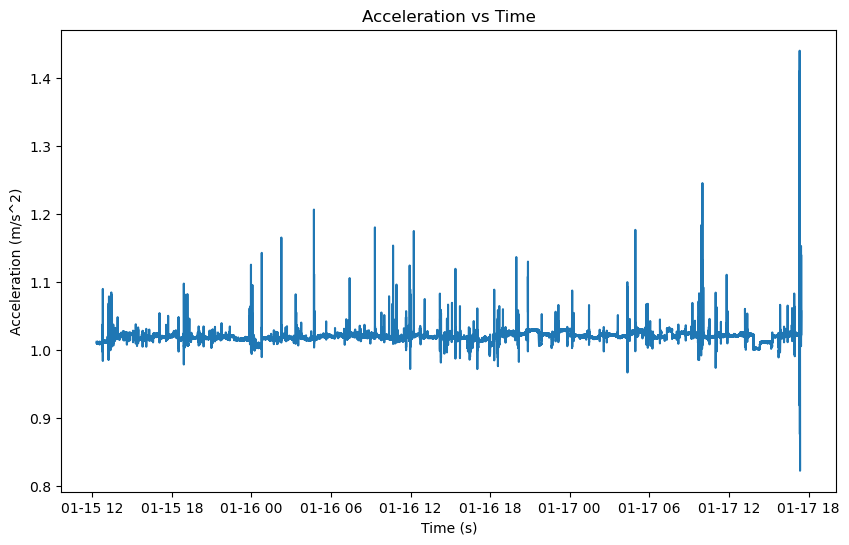

In [8]:
accel9_sample = accel9[['time', 'a']]

plt.figure(figsize=(10, 6))
plt.plot(accel9_sample['time'], accel9_sample['a'])
plt.title('Acceleration vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.show()


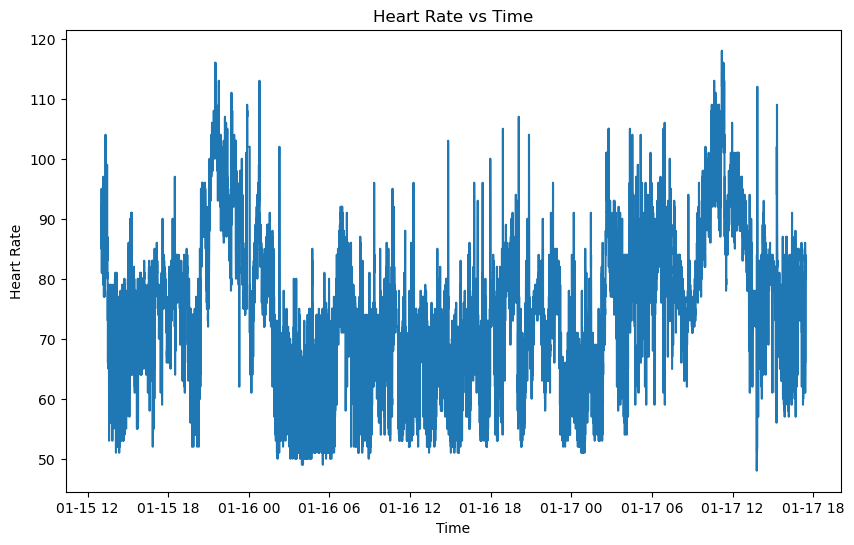

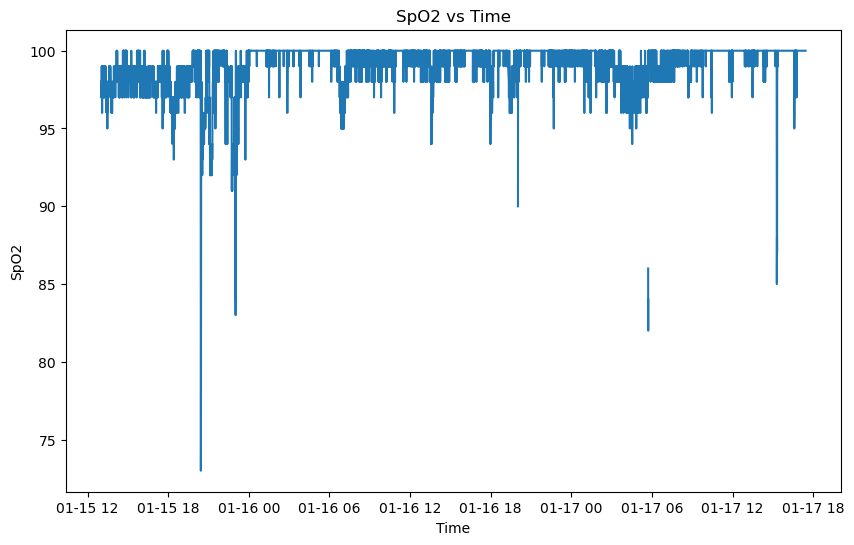

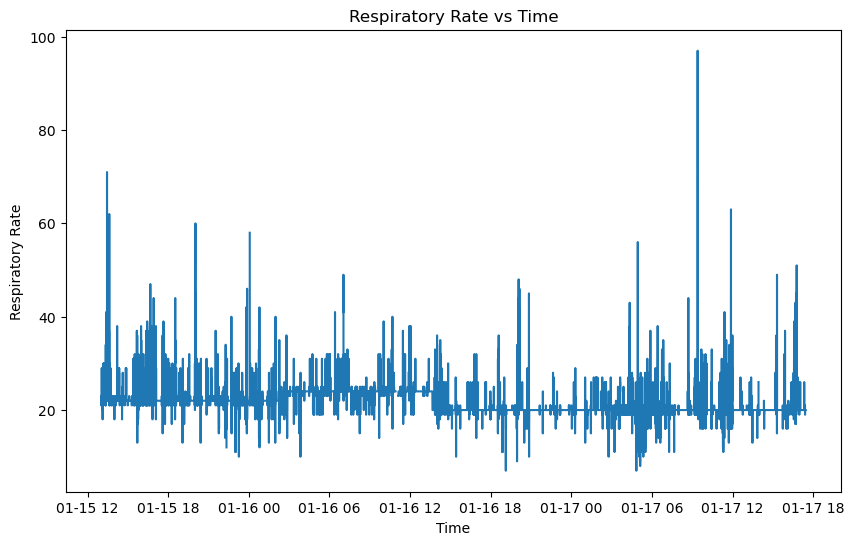

In [9]:
start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

heart_rate_sample = sickbay9[['time', 'heart_rate']]
heart_rate_sample = heart_rate_sample[(heart_rate_sample['time'] >= start) & (heart_rate_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(heart_rate_sample['time'], heart_rate_sample['heart_rate'])
plt.title('Heart Rate vs Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.show()

SpO2_sample = sickbay9[['time', 'SpO2']]
SpO2_sample = SpO2_sample[(SpO2_sample['time'] >= start) & (SpO2_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(SpO2_sample['time'], SpO2_sample['SpO2'])
plt.title('SpO2 vs Time')
plt.xlabel('Time')
plt.ylabel('SpO2')
plt.show()

respiratory_rate_sample = sickbay9[['time', 'respiratory_rate']]
respiratory_rate_sample = respiratory_rate_sample[(respiratory_rate_sample['time'] >= start) & (respiratory_rate_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(respiratory_rate_sample['time'], respiratory_rate_sample['respiratory_rate'])
plt.title('Respiratory Rate vs Time')
plt.xlabel('Time')
plt.ylabel('Respiratory Rate')
plt.show()

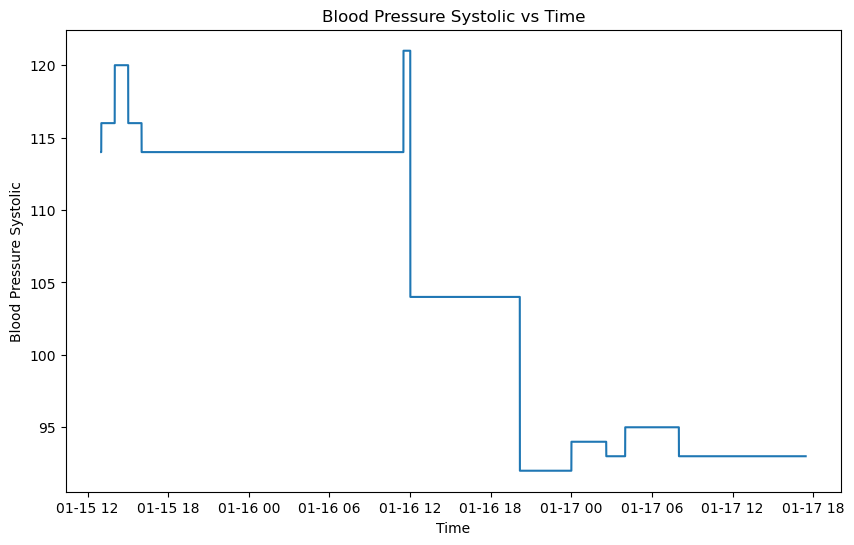

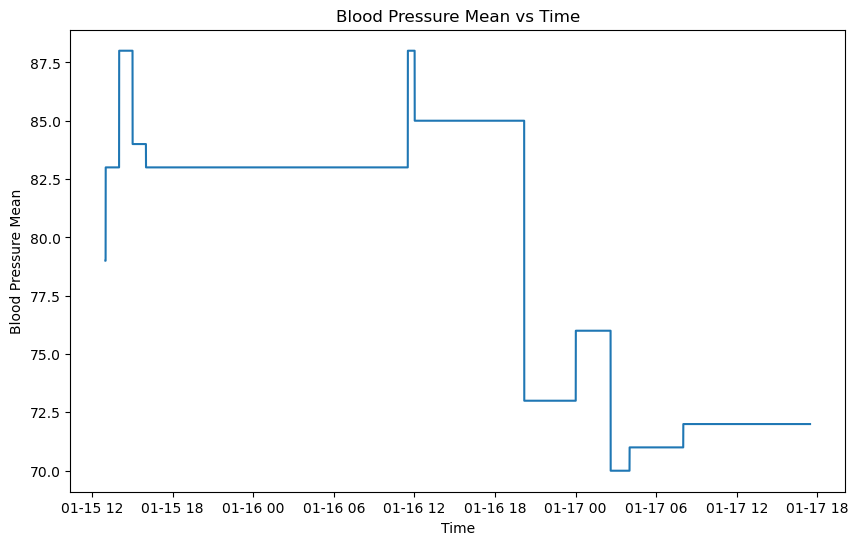

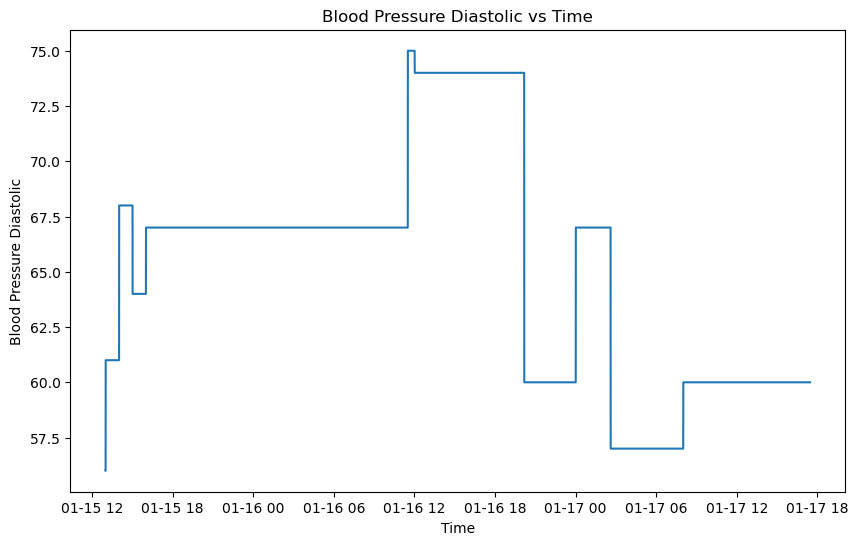

In [10]:
start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

blood_pressure_systolic_sample = sickbay9[['time', 'blood_pressure_systolic']]
blood_pressure_systolic_sample = blood_pressure_systolic_sample[(blood_pressure_systolic_sample['time'] >= start) & (blood_pressure_systolic_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(blood_pressure_systolic_sample['time'], blood_pressure_systolic_sample['blood_pressure_systolic'])
plt.title('Blood Pressure Systolic vs Time')
plt.xlabel('Time')
plt.ylabel('Blood Pressure Systolic')
plt.show()

blood_pressure_mean_sample = sickbay9[['time', 'blood_pressure_mean']]
blood_pressure_mean_sample = blood_pressure_mean_sample[(blood_pressure_mean_sample['time'] >= start) & (blood_pressure_mean_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(blood_pressure_mean_sample['time'], blood_pressure_mean_sample['blood_pressure_mean'])
plt.title('Blood Pressure Mean vs Time')
plt.xlabel('Time')
plt.ylabel('Blood Pressure Mean')
plt.show()

blood_pressure_diastolic_sample = sickbay9[['time', 'blood_pressure_diastolic']]
blood_pressure_diastolic_sample = blood_pressure_diastolic_sample[(blood_pressure_diastolic_sample['time'] >= start) & (blood_pressure_diastolic_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(blood_pressure_diastolic_sample['time'], blood_pressure_diastolic_sample['blood_pressure_diastolic'])
plt.title('Blood Pressure Diastolic vs Time')
plt.xlabel('Time')
plt.ylabel('Blood Pressure Diastolic')
plt.show()

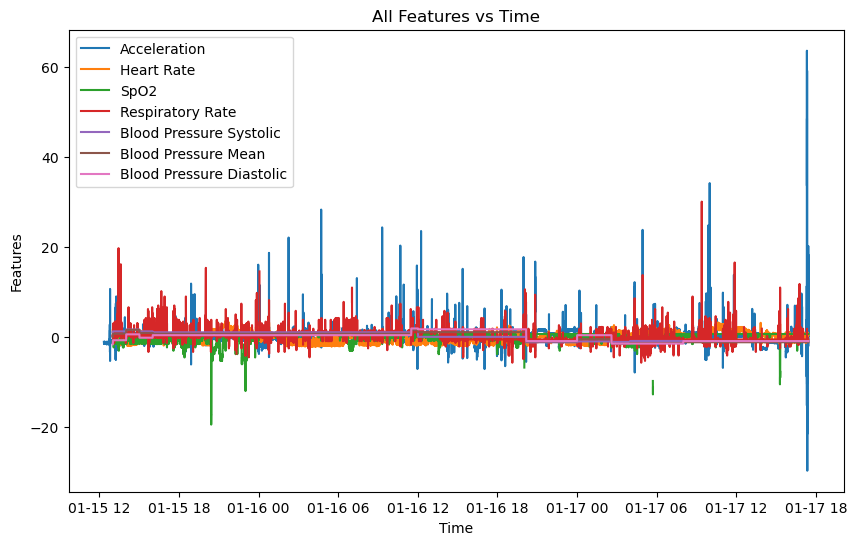

In [11]:
accel9_sample_standardized = accel9_sample.copy()
accel9_sample_standardized['a'] = (accel9_sample['a'] - accel9_sample['a'].mean()) / accel9_sample['a'].std()
heart_rate_sample_standardized = heart_rate_sample.copy()
heart_rate_sample_standardized['heart_rate'] = (heart_rate_sample['heart_rate'] - heart_rate_sample['heart_rate'].mean()) / heart_rate_sample['heart_rate'].std()
SpO2_sample_standardized = SpO2_sample.copy()
SpO2_sample_standardized['SpO2'] = (SpO2_sample['SpO2'] - SpO2_sample['SpO2'].mean()) / SpO2_sample['SpO2'].std()
respiratory_rate_sample_standardized = respiratory_rate_sample.copy()
respiratory_rate_sample_standardized['respiratory_rate'] = (respiratory_rate_sample['respiratory_rate'] - respiratory_rate_sample['respiratory_rate'].mean()) / respiratory_rate_sample['respiratory_rate'].std()
blood_pressure_systolic_sample_standardized = blood_pressure_systolic_sample.copy()
blood_pressure_systolic_sample_standardized['blood_pressure_systolic'] = (blood_pressure_systolic_sample['blood_pressure_systolic'] - blood_pressure_systolic_sample['blood_pressure_systolic'].mean()) / blood_pressure_systolic_sample['blood_pressure_systolic'].std()
blood_pressure_mean_sample_standardized = blood_pressure_mean_sample.copy()
blood_pressure_mean_sample_standardized['blood_pressure_mean'] = (blood_pressure_mean_sample['blood_pressure_mean'] - blood_pressure_mean_sample['blood_pressure_mean'].mean()) / blood_pressure_mean_sample['blood_pressure_mean'].std()
blood_pressure_diastolic_sample_standardized = blood_pressure_diastolic_sample.copy()
blood_pressure_diastolic_sample_standardized['blood_pressure_diastolic'] = (blood_pressure_diastolic_sample['blood_pressure_diastolic'] - blood_pressure_diastolic_sample['blood_pressure_diastolic'].mean()) / blood_pressure_diastolic_sample['blood_pressure_diastolic'].std()

plt.figure(figsize=(10, 6))
plt.plot(accel9_sample_standardized['time'], accel9_sample_standardized['a'])
plt.plot(heart_rate_sample_standardized['time'], heart_rate_sample_standardized['heart_rate'])
plt.plot(SpO2_sample_standardized['time'], SpO2_sample_standardized['SpO2'])
plt.plot(respiratory_rate_sample_standardized['time'], respiratory_rate_sample_standardized['respiratory_rate'])
plt.plot(blood_pressure_systolic_sample_standardized['time'], blood_pressure_systolic_sample_standardized['blood_pressure_systolic'])
plt.plot(blood_pressure_mean_sample_standardized['time'], blood_pressure_mean_sample_standardized['blood_pressure_mean'])
plt.plot(blood_pressure_diastolic_sample_standardized['time'], blood_pressure_diastolic_sample_standardized['blood_pressure_diastolic'])
plt.legend(['Acceleration', 'Heart Rate', 'SpO2', 'Respiratory Rate', 'Blood Pressure Systolic', 'Blood Pressure Mean', 'Blood Pressure Diastolic'])
plt.title('All Features vs Time')
plt.xlabel('Time')
plt.ylabel('Features')
plt.show()

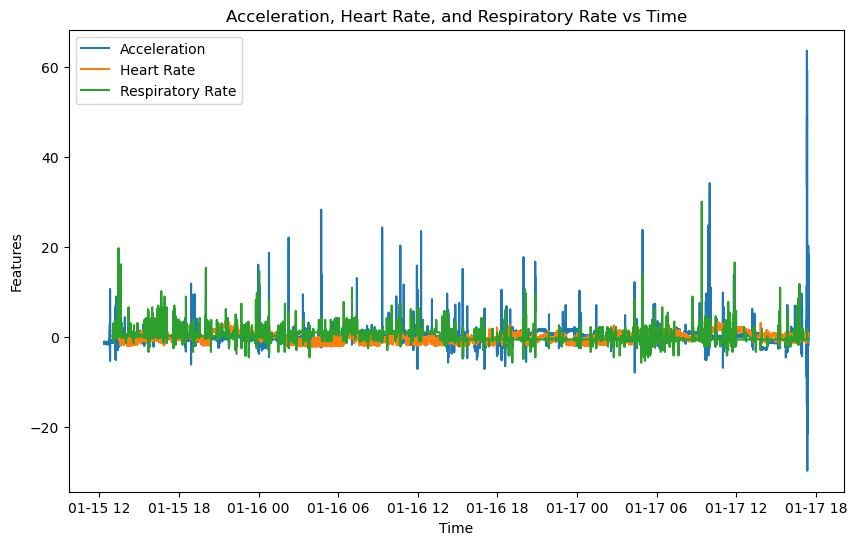

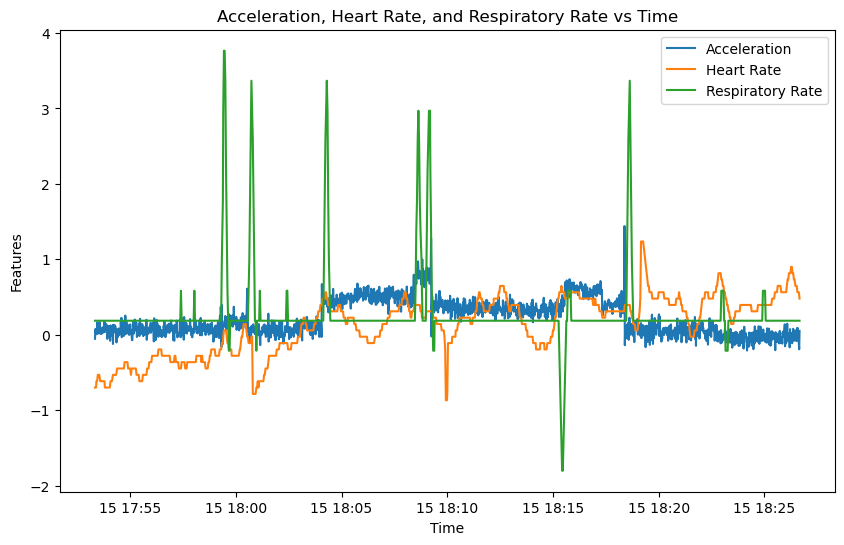

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(accel9_sample_standardized['time'], accel9_sample_standardized['a'])
plt.plot(heart_rate_sample_standardized['time'], heart_rate_sample_standardized['heart_rate'])
plt.plot(respiratory_rate_sample_standardized['time'], respiratory_rate_sample_standardized['respiratory_rate'])
plt.legend(['Acceleration', 'Heart Rate', 'Respiratory Rate'])
plt.title('Acceleration, Heart Rate, and Respiratory Rate vs Time')
plt.xlabel('Time')
plt.ylabel('Features')
plt.show()

start_sample = accel9['time'].iloc[20000]
end_sample = accel9['time'].iloc[22000]

accel9_sample_standardized_sample = accel9_sample_standardized[(accel9_sample_standardized['time'] >= start_sample) & (accel9_sample_standardized['time'] <= end_sample)]
heart_rate_sample_standardized_sample = heart_rate_sample_standardized[(heart_rate_sample_standardized['time'] >= start_sample) & (heart_rate_sample_standardized['time'] <= end_sample)]
respiratory_rate_sample_standardized_sample = respiratory_rate_sample_standardized[(respiratory_rate_sample_standardized['time'] >= start_sample) & (respiratory_rate_sample_standardized['time'] <= end_sample)]

plt.figure(figsize=(10, 6))
plt.plot(accel9_sample_standardized_sample['time'], accel9_sample_standardized_sample['a'])
plt.plot(heart_rate_sample_standardized_sample['time'], heart_rate_sample_standardized_sample['heart_rate'])
plt.plot(respiratory_rate_sample_standardized_sample['time'], respiratory_rate_sample_standardized_sample['respiratory_rate'])
plt.legend(['Acceleration', 'Heart Rate', 'Respiratory Rate'])
plt.title('Acceleration, Heart Rate, and Respiratory Rate vs Time')
plt.xlabel('Time')
plt.ylabel('Features')
plt.show()

In [13]:
agents = ['propofol', 'dexmedetomidine', 'midazolam', 'ketamine', 'diazepam', 'lidocaine', 'clonidine', 'hydroxyzine', 'diphenhydramine', 'fentanyl', 'hydromorphone', 'morphine', 'methadone', 'nalbuphine', 'acetaminophen']
pattern = '|'.join(agents)
filtered_mar9 = mar9[mar9['med_name'].str.lower().str.contains(pattern, regex=True)]
filtered_mar9 = filtered_mar9[~filtered_mar9['mar_action'].str.contains('Missed')]
filtered_mar9 = filtered_mar9.dropna(subset=['dose'])

print(filtered_mar9.shape)
print(filtered_mar9.keys())
print(filtered_mar9.head())
print(filtered_mar9.tail())

print(filtered_mar9['mar_action'].value_counts())
print(filtered_mar9['med_name'].value_counts())

(806, 4)
Index(['time', 'dose', 'mar_action', 'med_name'], dtype='object')
                  time  dose   mar_action  \
63 2024-01-12 19:00:00   9.9    ['Given']   
64 2024-01-12 19:01:00  20.0    ['Given']   
65 2024-01-12 19:09:00   0.5  ['New Bag']   
66 2024-01-12 19:15:00   1.0  ['New Bag']   
67 2024-01-12 19:19:00   0.3  ['New Bag']   

                                           med_name  
63    ['DEXMEDETOMIDINE BOLUS FROM BAG (JHH PEDS)']  
64       ['PROPOFOL 10 MG/ML INTRAVENOUS EMULSION']  
65        ['FENTANYL INFUSION 50 MCG/ML (JHH PED)']  
66        ['FENTANYL INFUSION 50 MCG/ML (JHH PED)']  
67  ['DEXMEDETOMIDINE INFUSION 4 MCG/ML (JHH PED)']  
                    time  dose mar_action  \
2428 2024-01-30 20:01:00   0.8  ['Given']   
2441 2024-01-31 09:24:00   0.8  ['Given']   
2446 2024-01-31 20:08:00   0.8  ['Given']   
2466 2024-02-01 20:24:00   0.8  ['Given']   
2542 2024-02-07 08:19:00   5.0  ['Given']   

                                          med_name  
2428  

In [14]:
bolus = filtered_mar9[filtered_mar9['med_name'].str.contains('bolus', case=False, regex=True)]

print(bolus.shape)
print(bolus.keys())
print(bolus.head())
print(bolus.tail())

print(bolus['mar_action'].value_counts())
print(bolus['med_name'].value_counts())

(135, 4)
Index(['time', 'dose', 'mar_action', 'med_name'], dtype='object')
                  time  dose mar_action  \
63 2024-01-12 19:00:00   9.9  ['Given']   
73 2024-01-12 19:45:00  19.7  ['Given']   
77 2024-01-12 19:55:00  19.8  ['Given']   
86 2024-01-12 20:15:00  19.7  ['Given']   
94 2024-01-12 21:55:00  19.7  ['Given']   

                                         med_name  
63  ['DEXMEDETOMIDINE BOLUS FROM BAG (JHH PEDS)']  
73         ['FENTANYL BOLUS FROM BAG (JHH PEDS)']  
77         ['FENTANYL BOLUS FROM BAG (JHH PEDS)']  
86         ['FENTANYL BOLUS FROM BAG (JHH PEDS)']  
94         ['FENTANYL BOLUS FROM BAG (JHH PEDS)']  
                    time   dose   mar_action  \
1921 2024-01-22 06:45:00  0.788    ['Given']   
1949 2024-01-22 09:00:00  4.728  ['New Bag']   
1955 2024-01-22 09:11:00  0.788    ['Given']   
1988 2024-01-22 13:41:00  4.728  ['New Bag']   
1989 2024-01-22 13:51:00  0.788    ['Given']   

                                     med_name  
1921  ['MIDAZOLAM

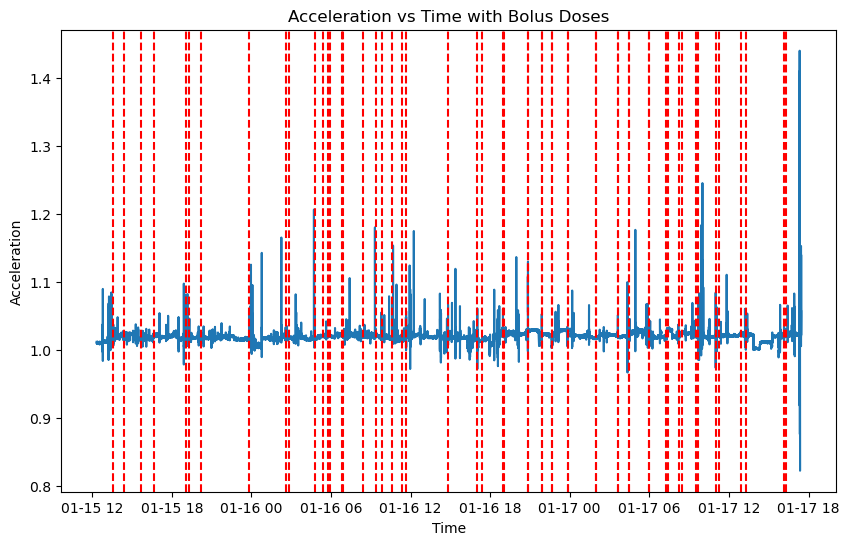

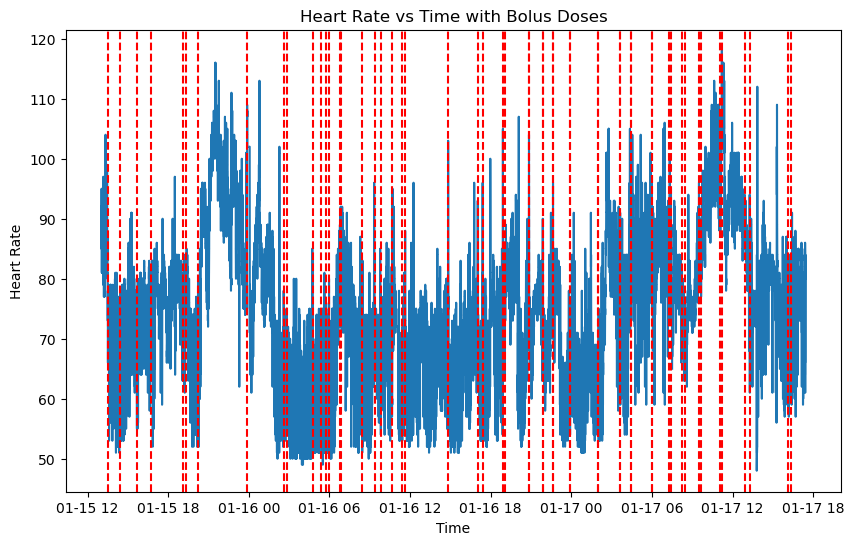

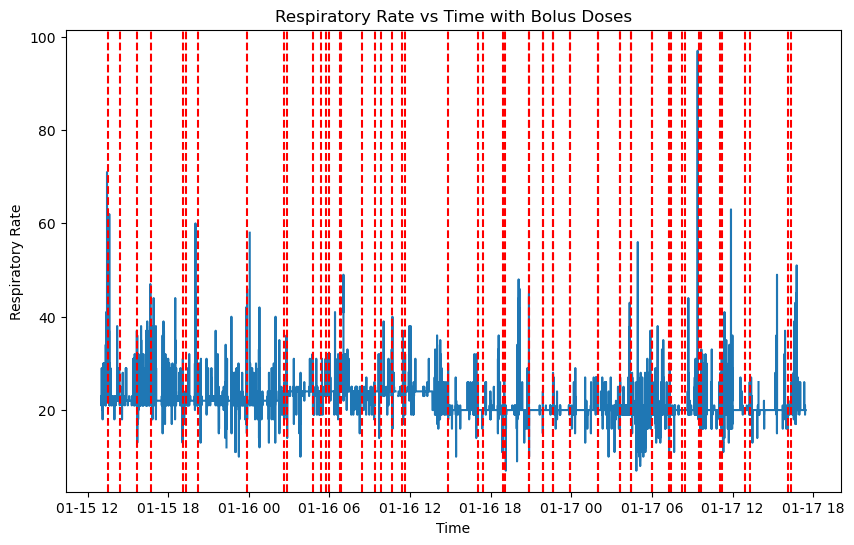

In [15]:
start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

bolus_sample = bolus[(bolus['time'] >= start) & (bolus['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(accel9_sample['time'], accel9_sample['a'])
for bolus_time in bolus_sample['time']:
    plt.axvline(x=bolus_time, color='red', linestyle='--')
plt.title('Acceleration vs Time with Bolus Doses')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(heart_rate_sample['time'], heart_rate_sample['heart_rate'])
for bolus_time in bolus_sample['time']:
    plt.axvline(x=bolus_time, color='red', linestyle='--')
plt.title('Heart Rate vs Time with Bolus Doses')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.show()

start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

bolus_sample = bolus[(bolus['time'] >= start) & (bolus['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(respiratory_rate_sample['time'], respiratory_rate_sample['respiratory_rate'])
for bolus_time in bolus_sample['time']:
    plt.axvline(x=bolus_time, color='red', linestyle='--')
plt.title('Respiratory Rate vs Time with Bolus Doses')
plt.xlabel('Time')
plt.ylabel('Respiratory Rate')
plt.show()

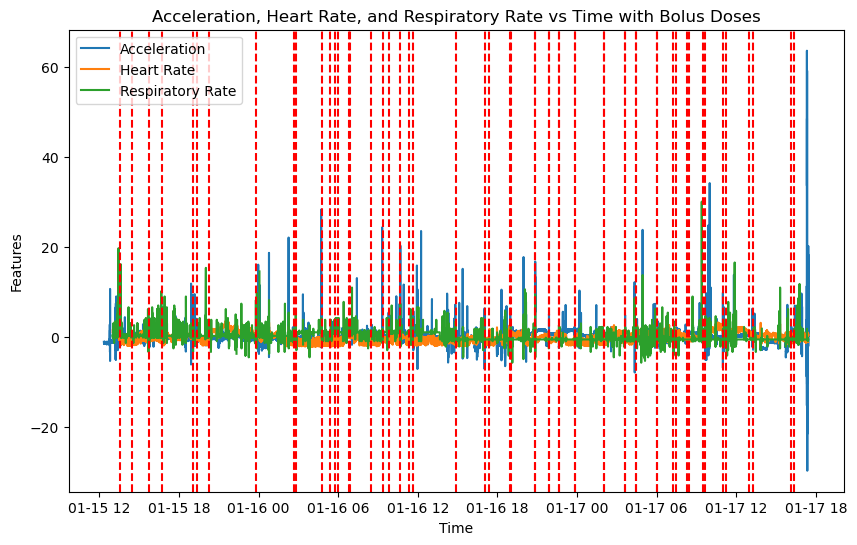

In [16]:
start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

bolus_sample = bolus[(bolus['time'] >= start) & (bolus['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(accel9_sample_standardized['time'], accel9_sample_standardized['a'])
plt.plot(heart_rate_sample_standardized['time'], heart_rate_sample_standardized['heart_rate'])
plt.plot(respiratory_rate_sample_standardized['time'], respiratory_rate_sample_standardized['respiratory_rate'])
for bolus_time in bolus_sample['time']:
    plt.axvline(x=bolus_time, color='red', linestyle='--')
plt.legend(['Acceleration', 'Heart Rate', 'Respiratory Rate'])
plt.title('Acceleration, Heart Rate, and Respiratory Rate vs Time with Bolus Doses')
plt.xlabel('Time')
plt.ylabel('Features')
plt.show()

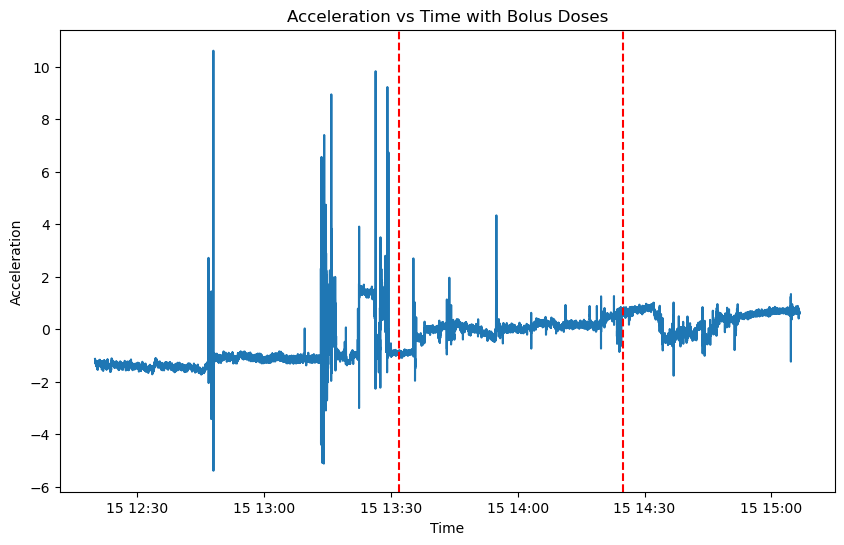

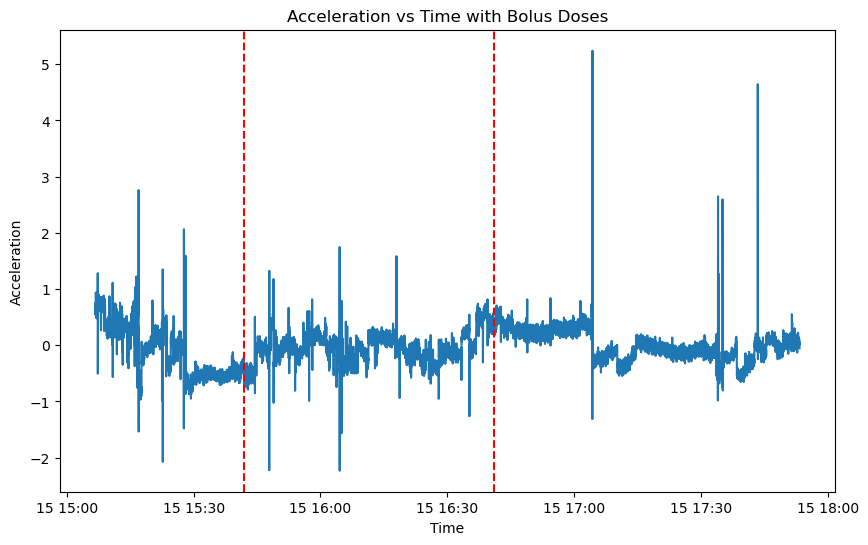

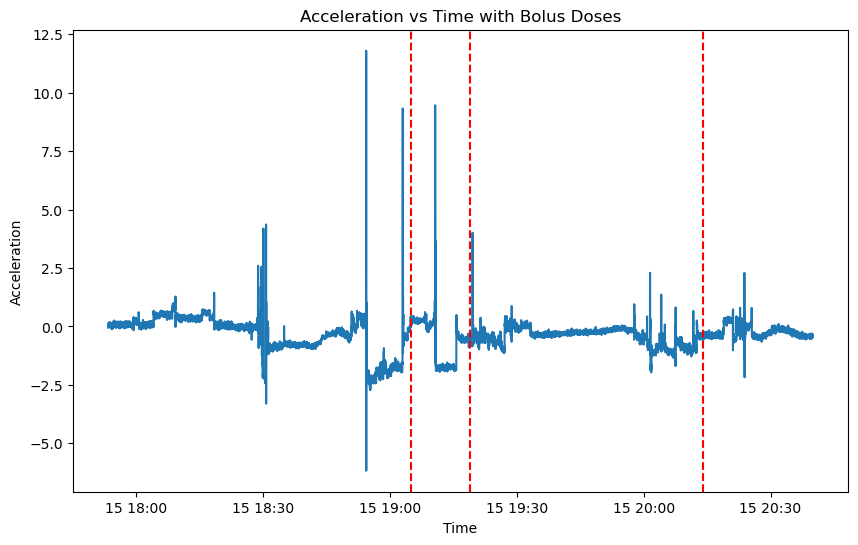

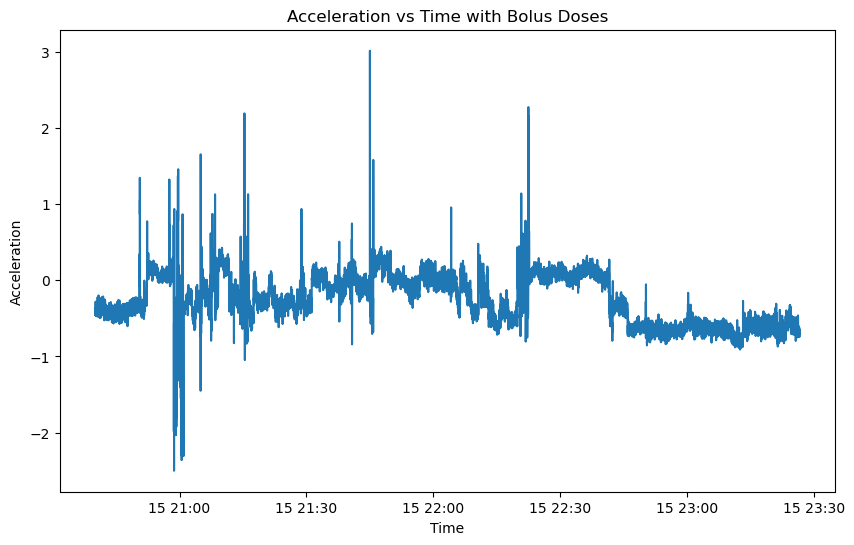

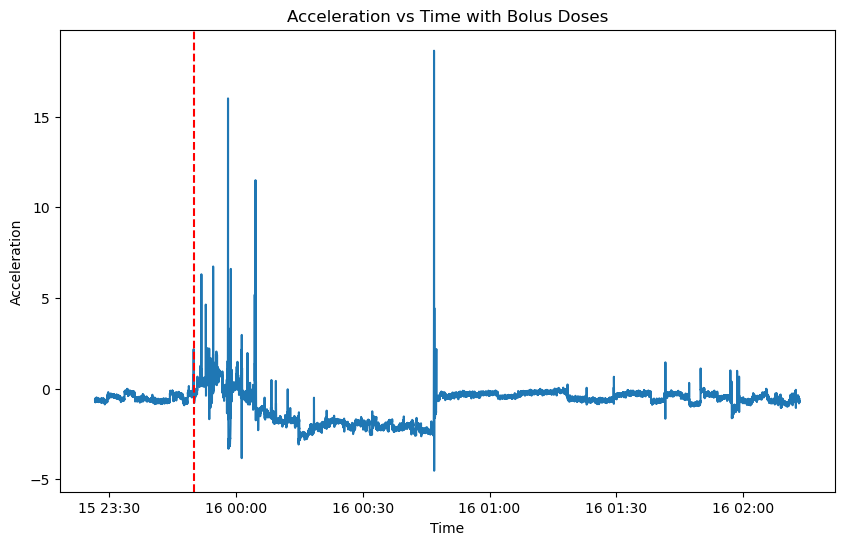

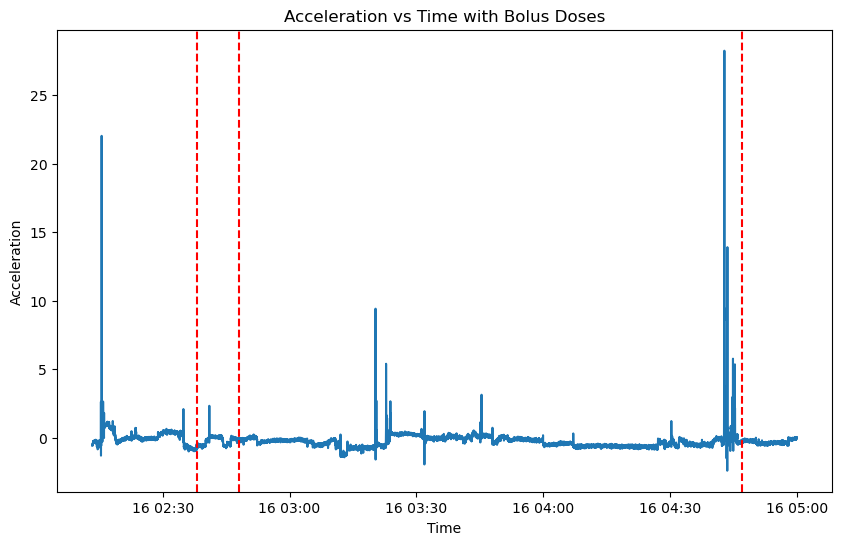

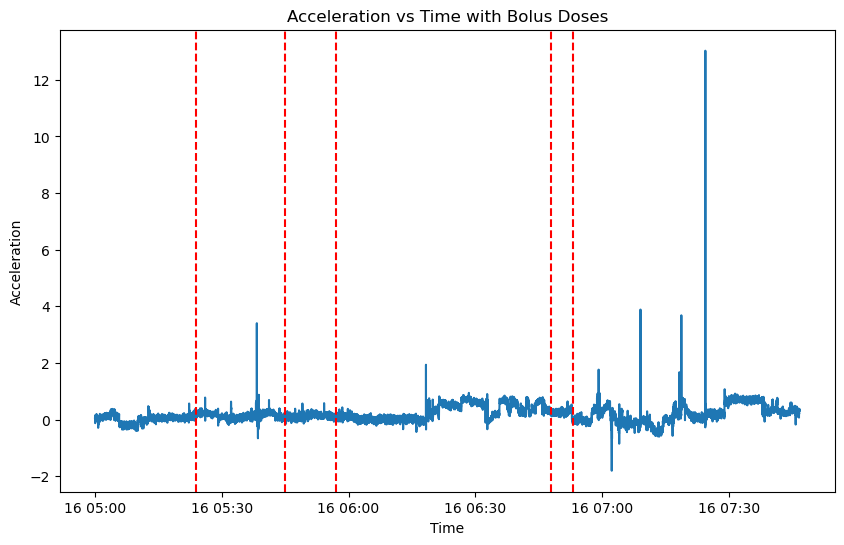

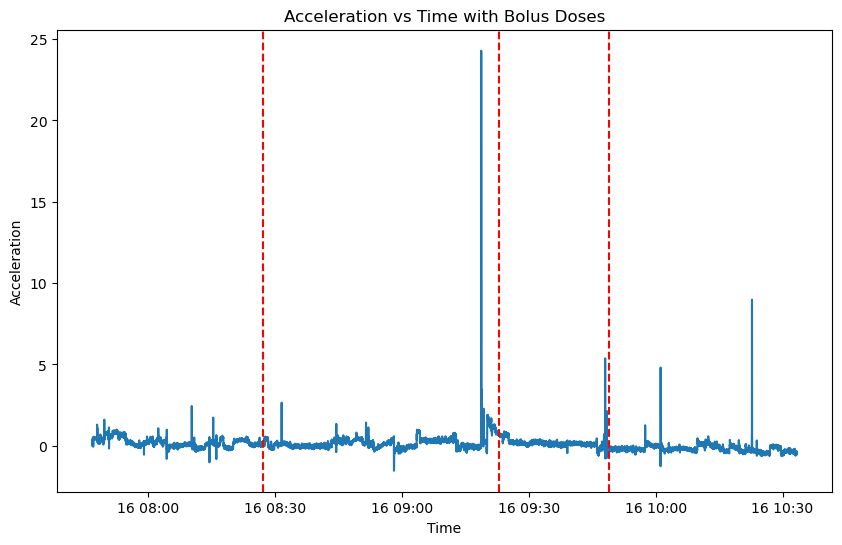

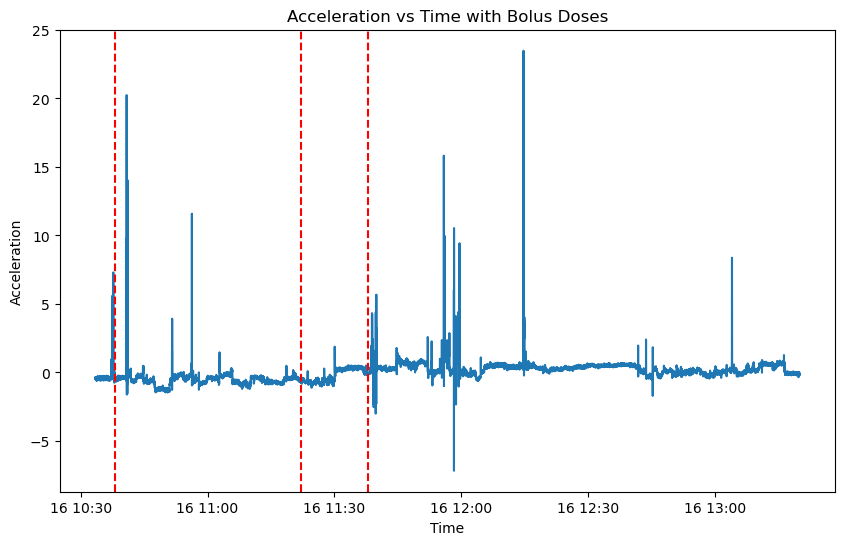

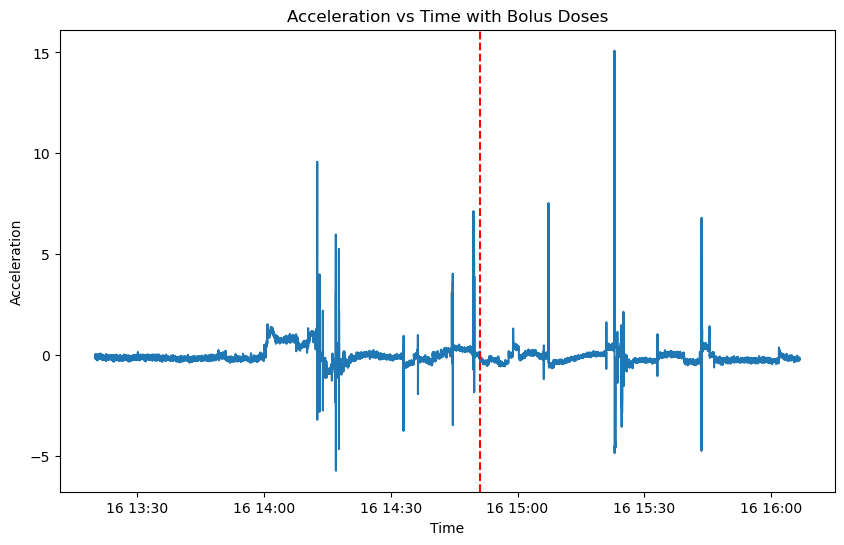

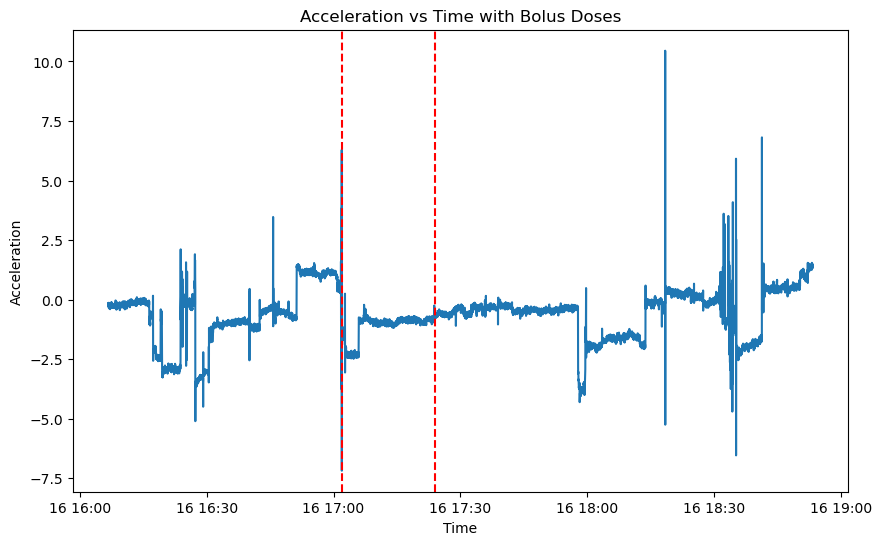

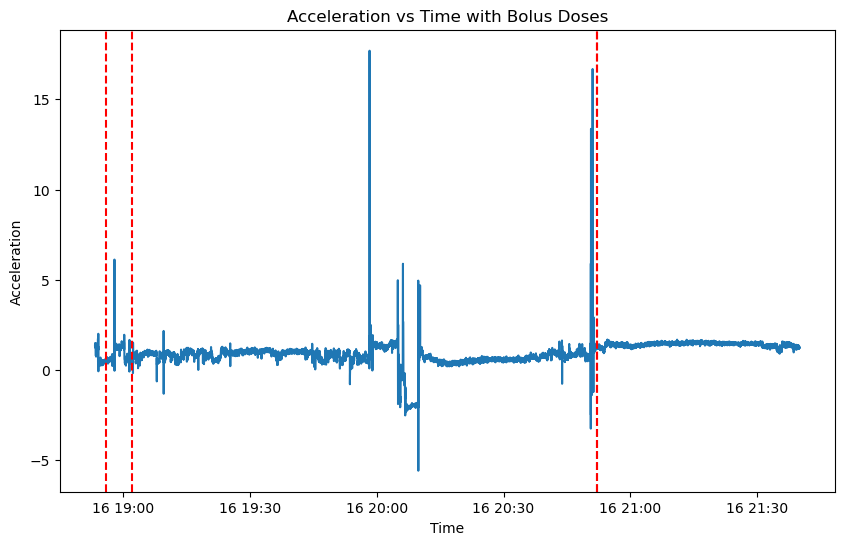

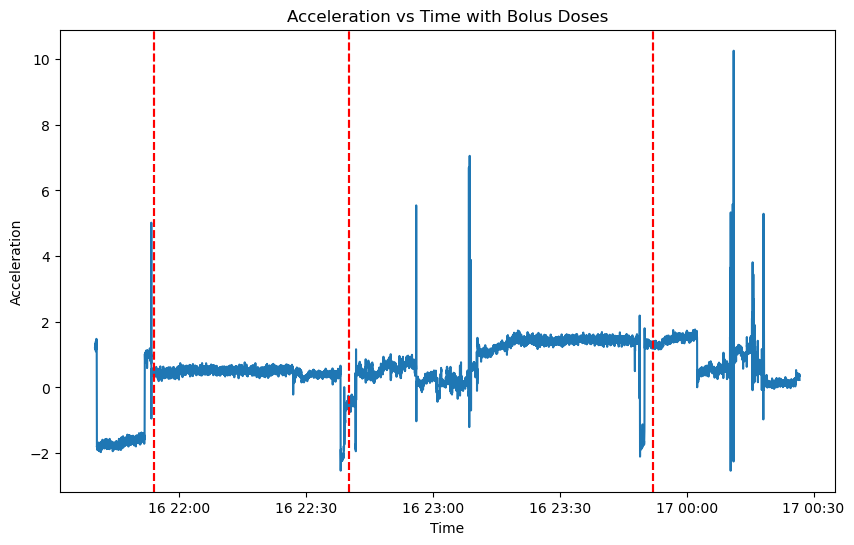

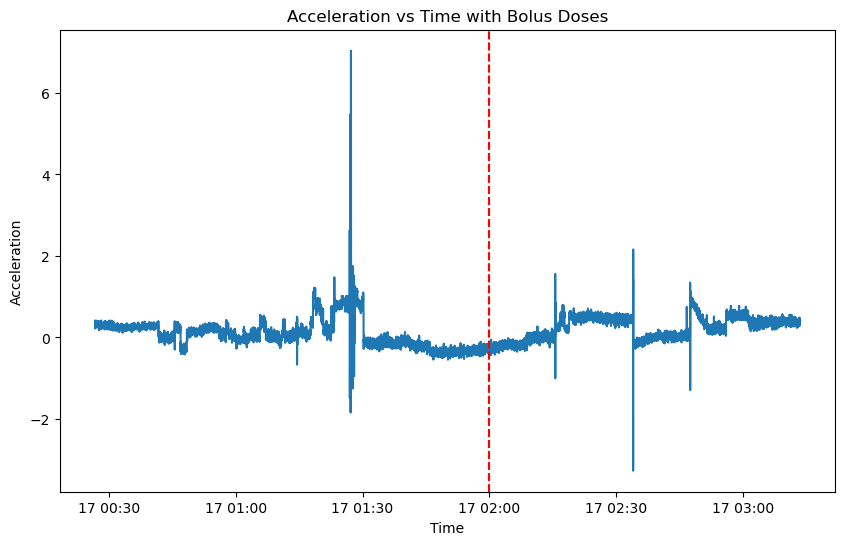

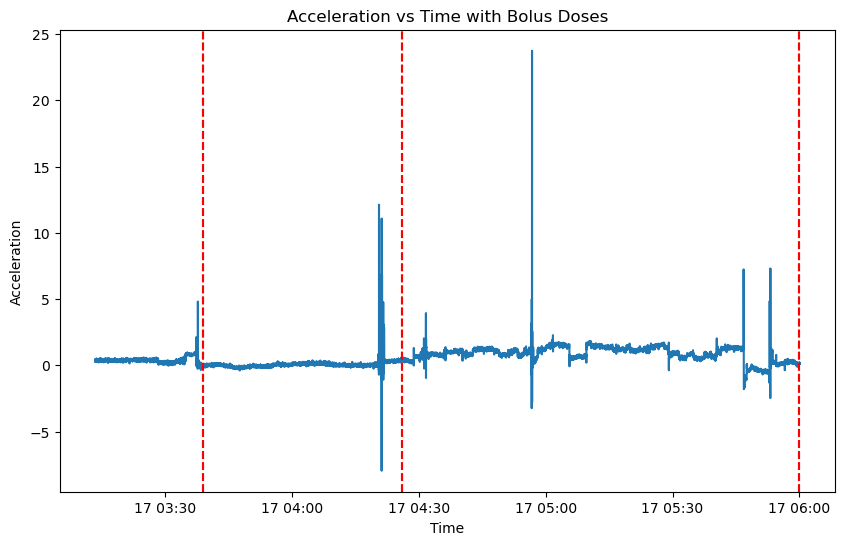

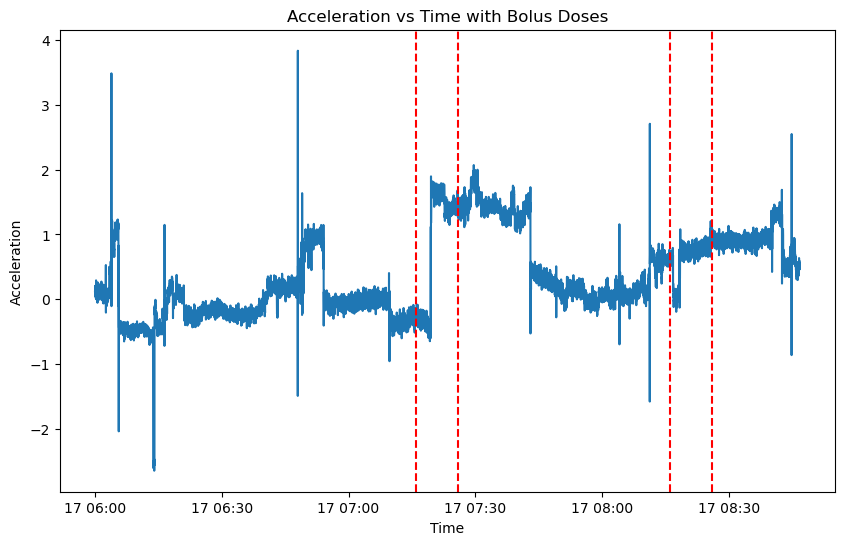

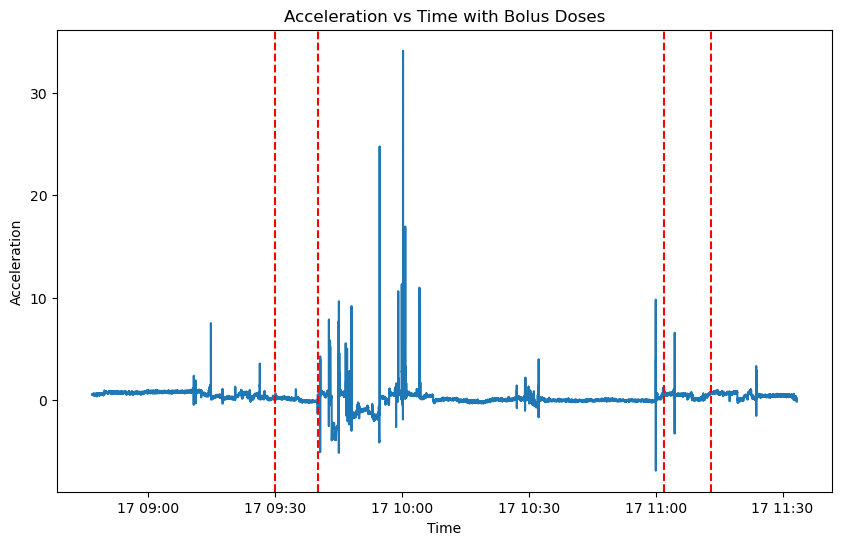

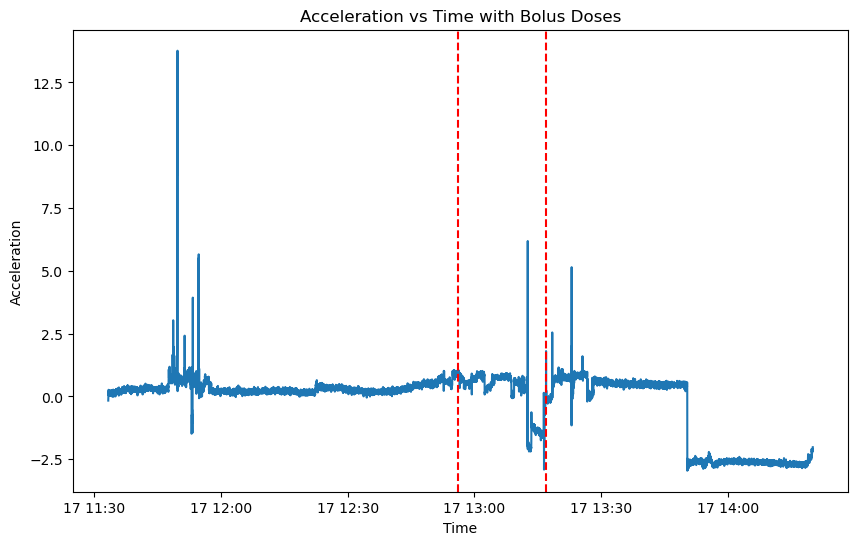

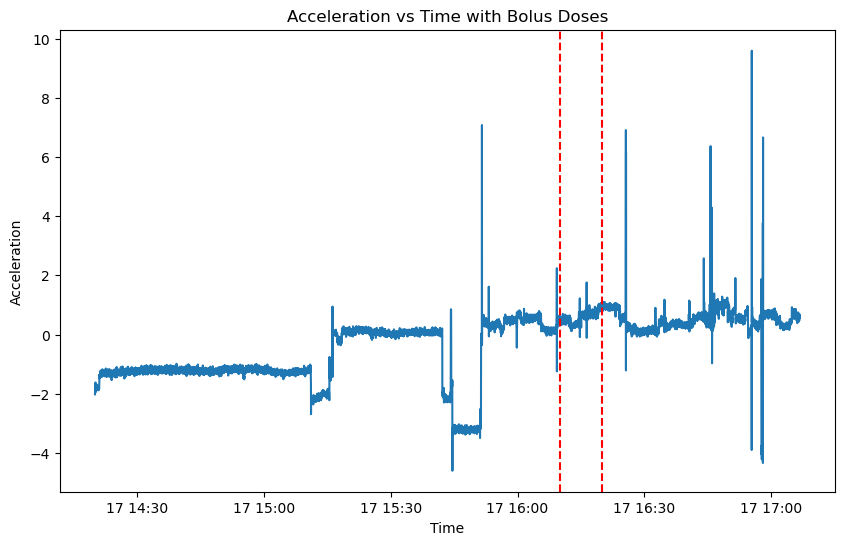

In [17]:
for i in range(0, len(accel9)-10000, 10000):
    start_sample = accel9['time'].iloc[i]
    end_sample = accel9['time'].iloc[i+10000]

    accel9_sample_standardized_sample = accel9_sample_standardized[(accel9_sample_standardized['time'] >= start_sample) & (accel9_sample_standardized['time'] <= end_sample)]
    bolus_sample = bolus[(bolus['time'] >= start_sample) & (bolus['time'] <= end_sample)]

    plt.figure(figsize=(10, 6))
    plt.plot(accel9_sample_standardized_sample['time'], accel9_sample_standardized_sample['a'])
    for bolus_time in bolus_sample['time']:
        plt.axvline(x=bolus_time, color='red', linestyle='--')
    plt.title('Acceleration vs Time with Bolus Doses')
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.show()

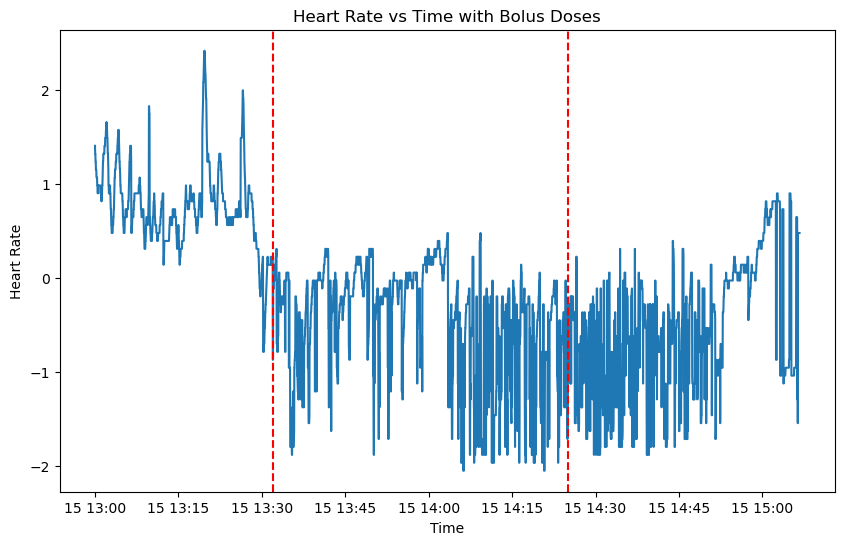

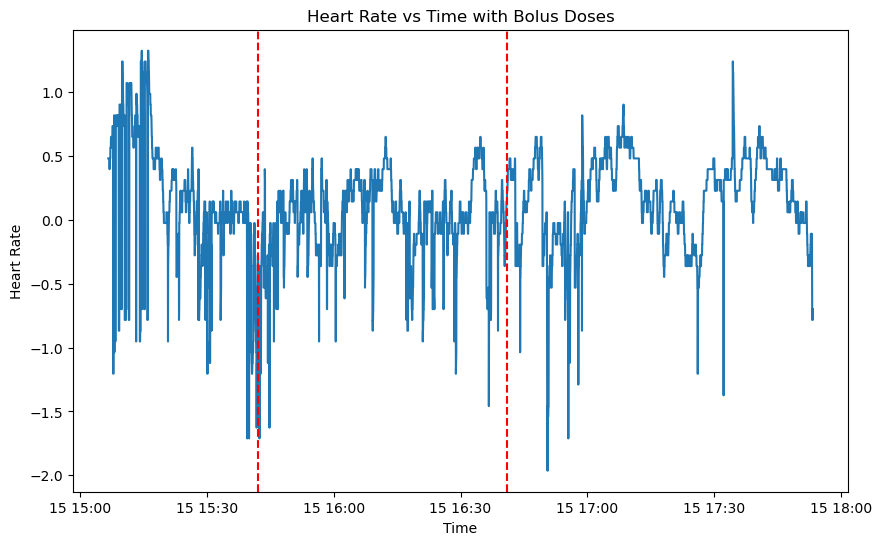

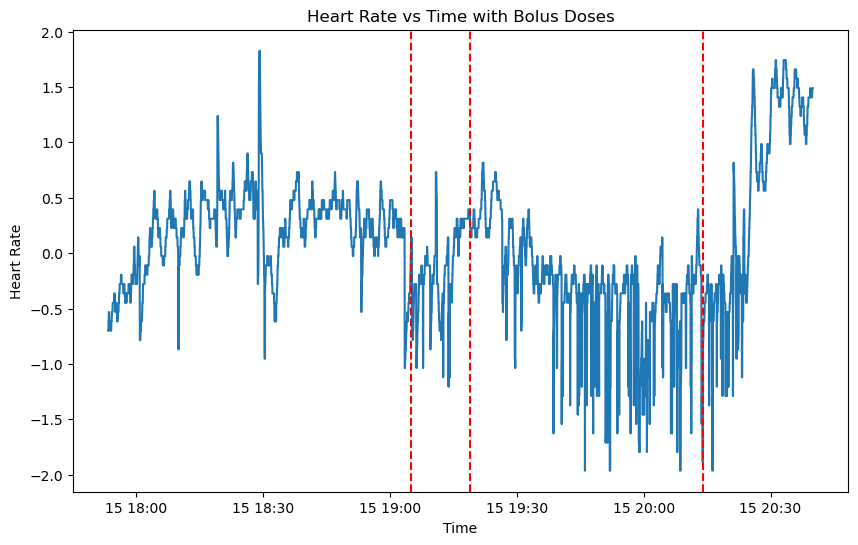

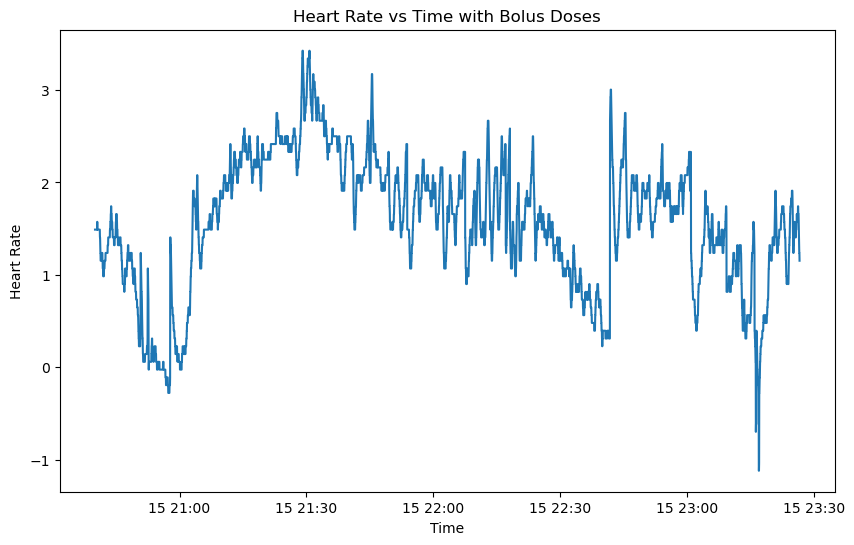

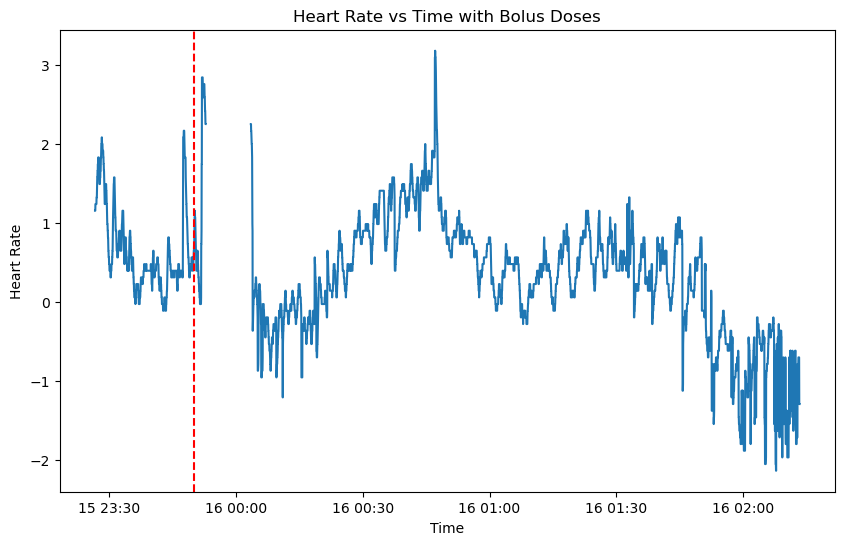

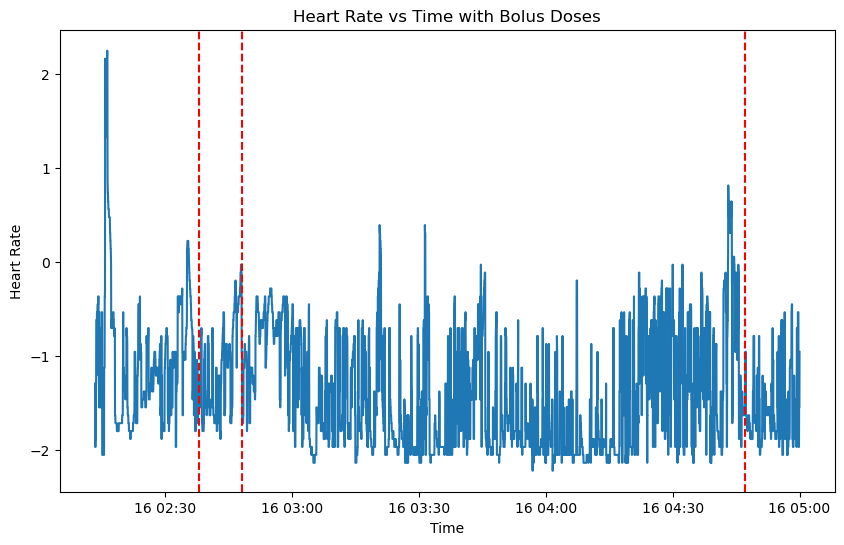

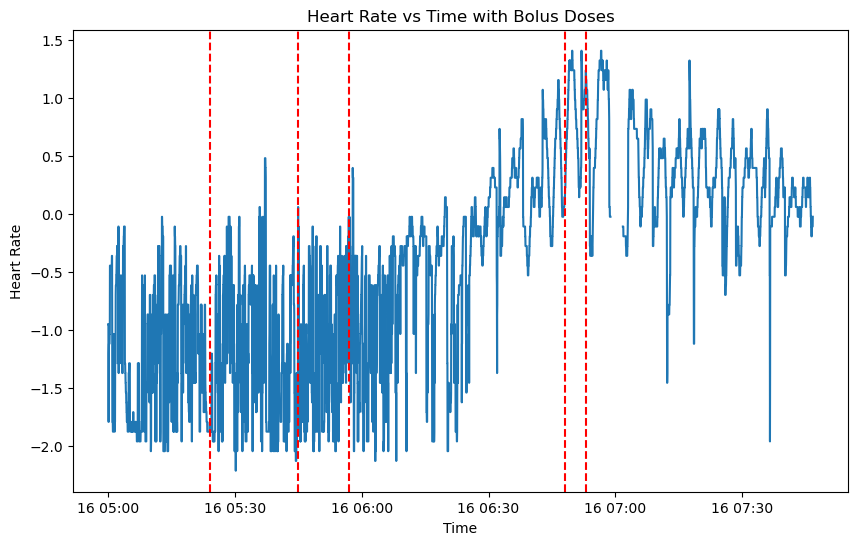

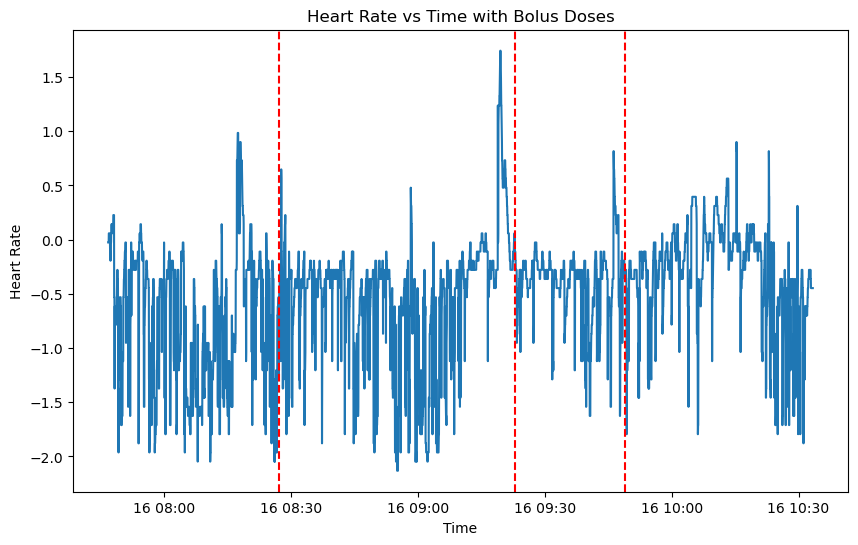

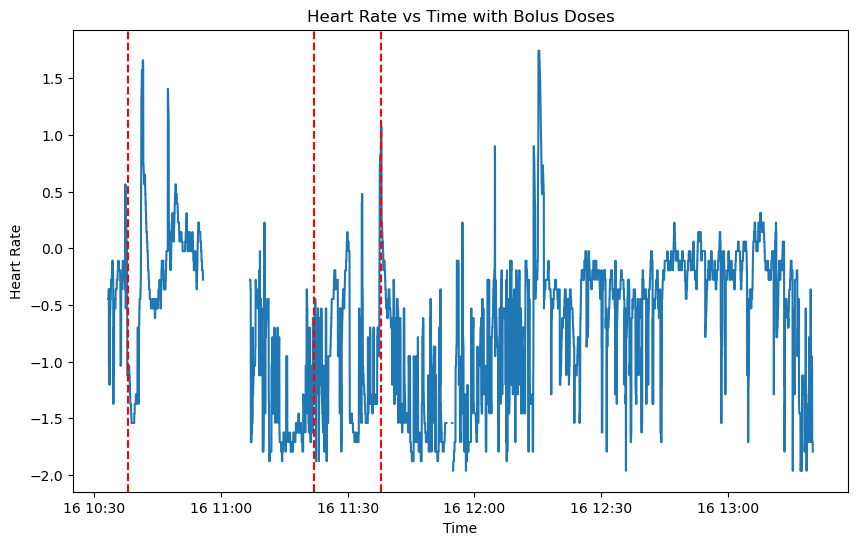

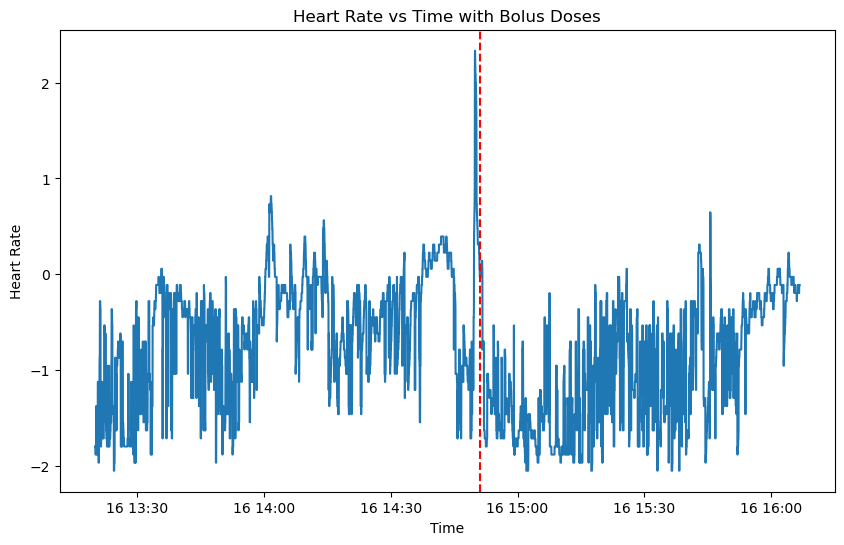

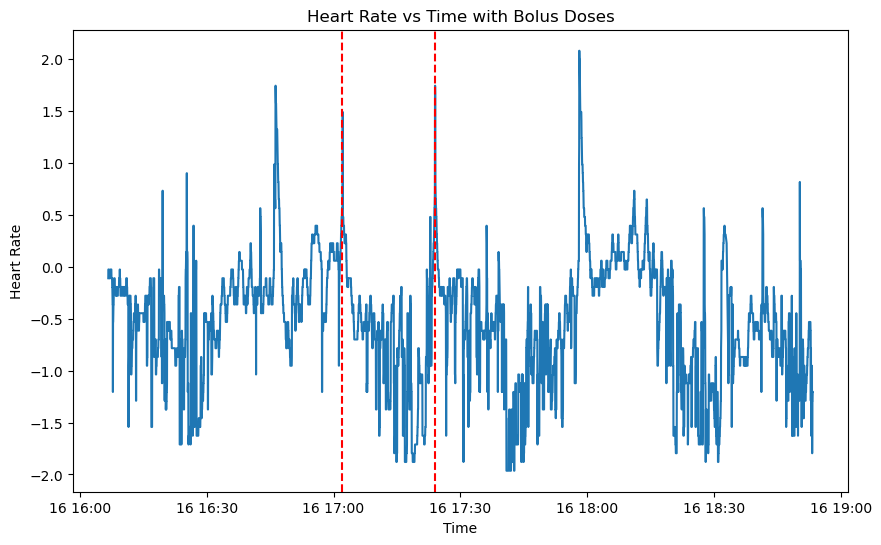

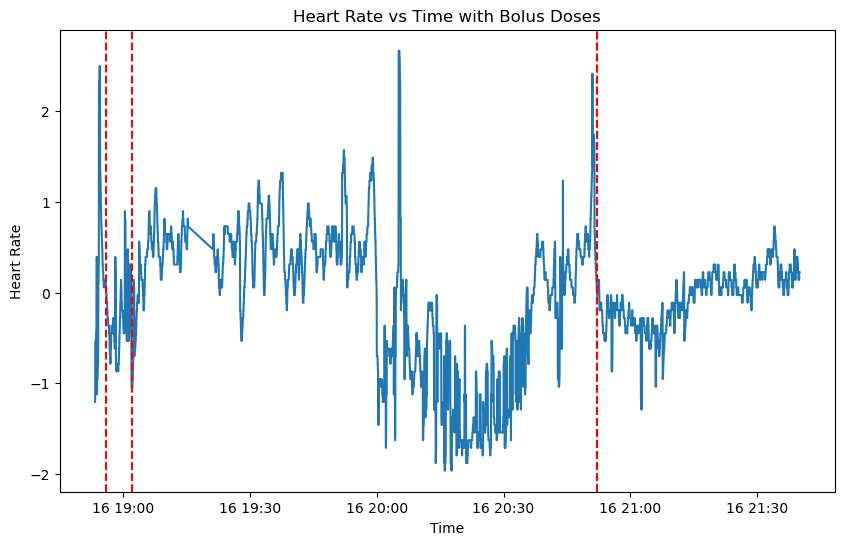

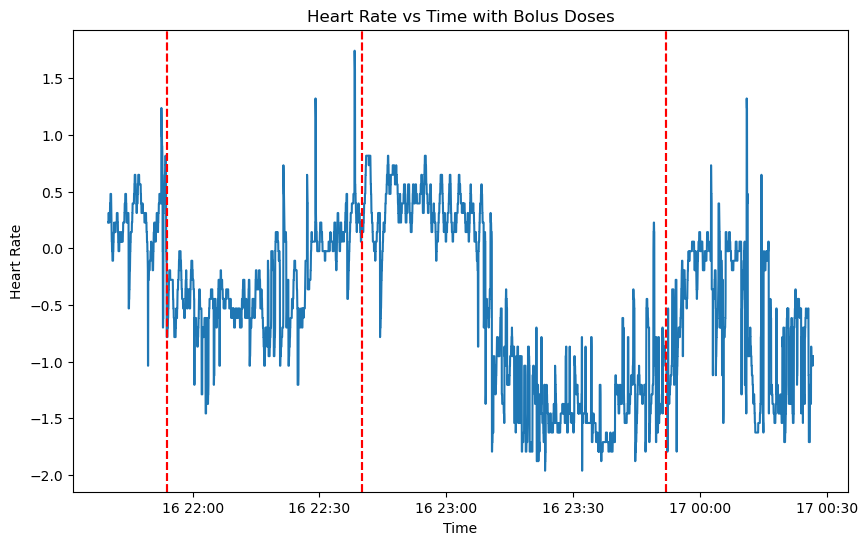

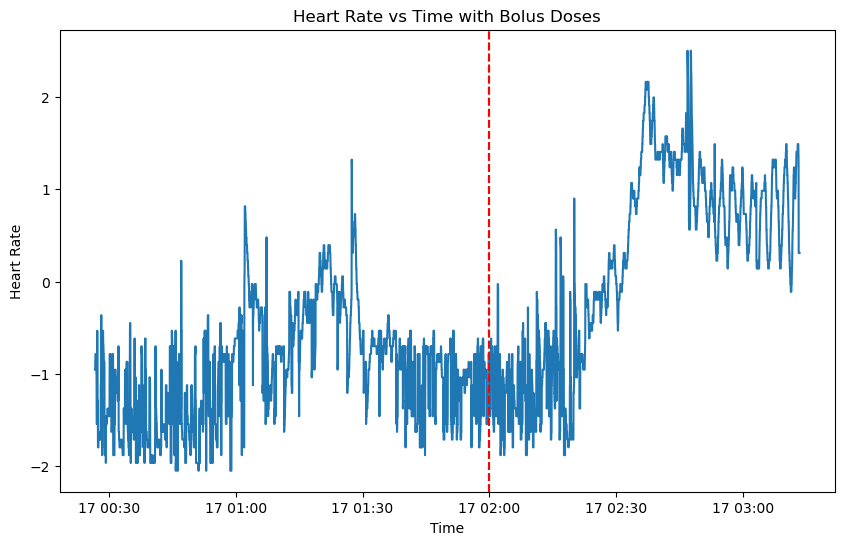

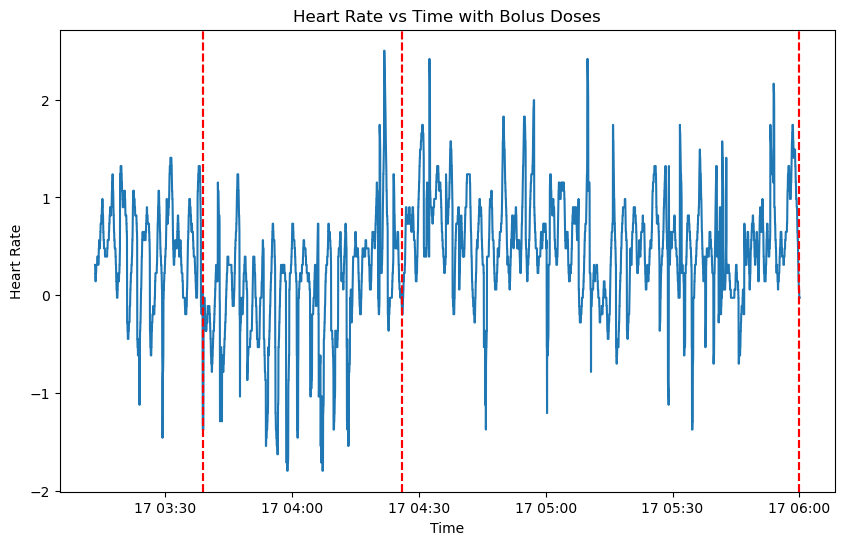

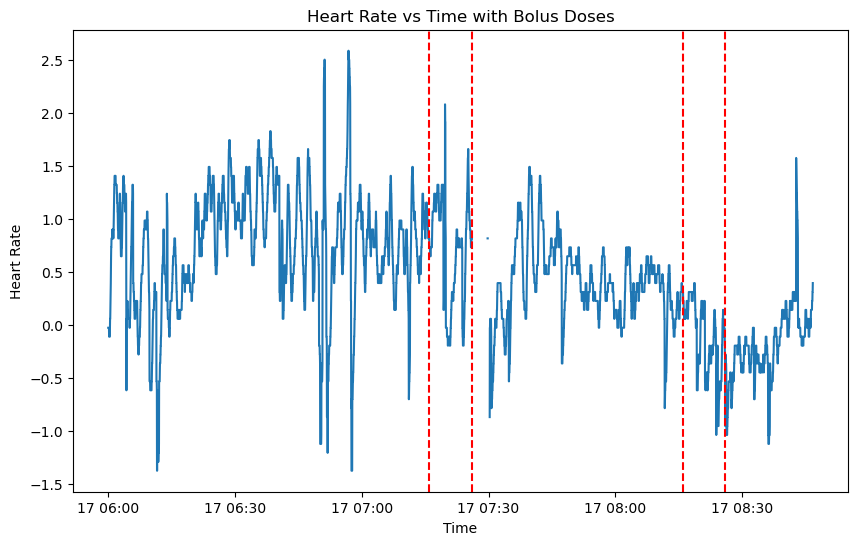

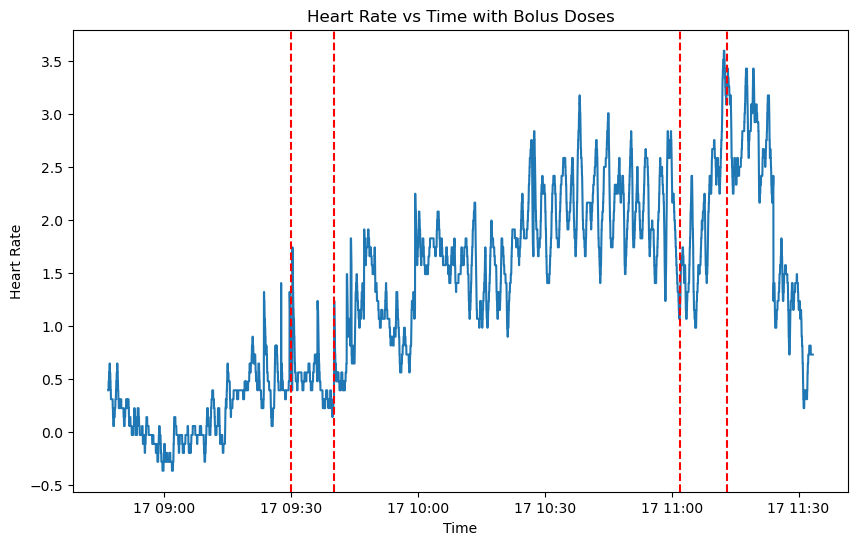

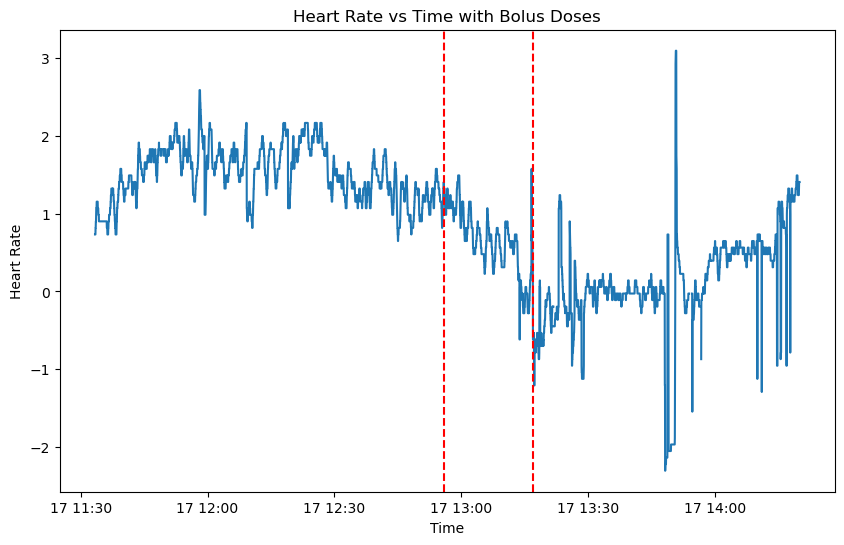

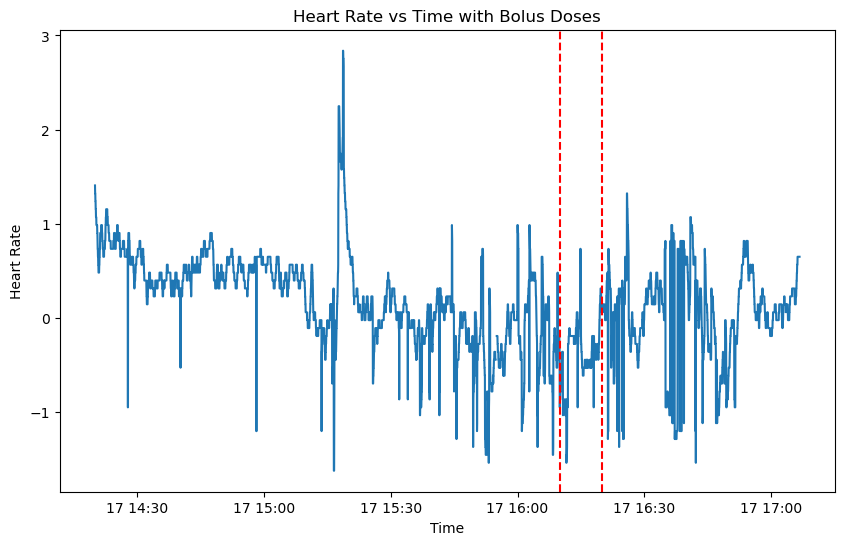

In [18]:
for i in range(0, len(accel9)-10000, 10000):
    start_sample = accel9['time'].iloc[i]
    end_sample = accel9['time'].iloc[i+10000]

    heart_rate_sample_standardized_sample = heart_rate_sample_standardized[(heart_rate_sample_standardized['time'] >= start_sample) & (heart_rate_sample_standardized['time'] <= end_sample)]
    bolus_sample = bolus[(bolus['time'] >= start_sample) & (bolus['time'] <= end_sample)]

    plt.figure(figsize=(10, 6))
    plt.plot(heart_rate_sample_standardized_sample['time'], heart_rate_sample_standardized_sample['heart_rate'])
    for bolus_time in bolus_sample['time']:
        plt.axvline(x=bolus_time, color='red', linestyle='--')
    plt.title('Heart Rate vs Time with Bolus Doses')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate')
    plt.show()

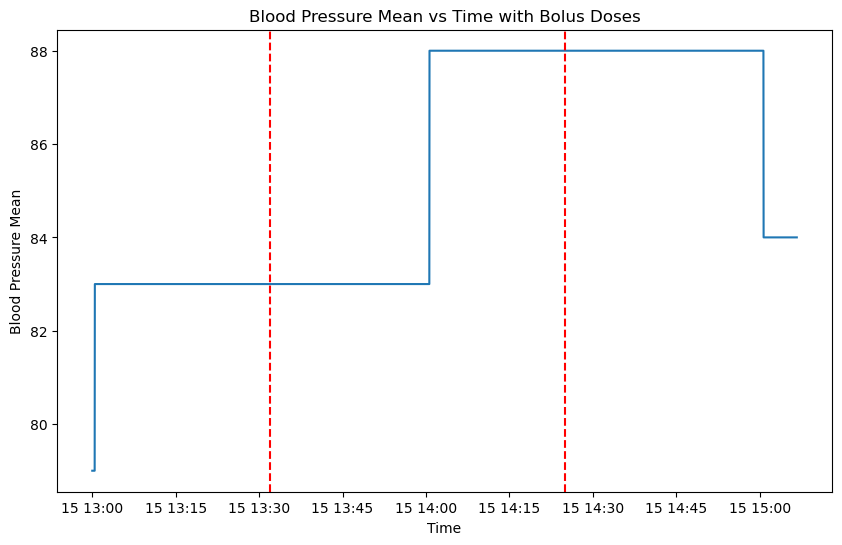

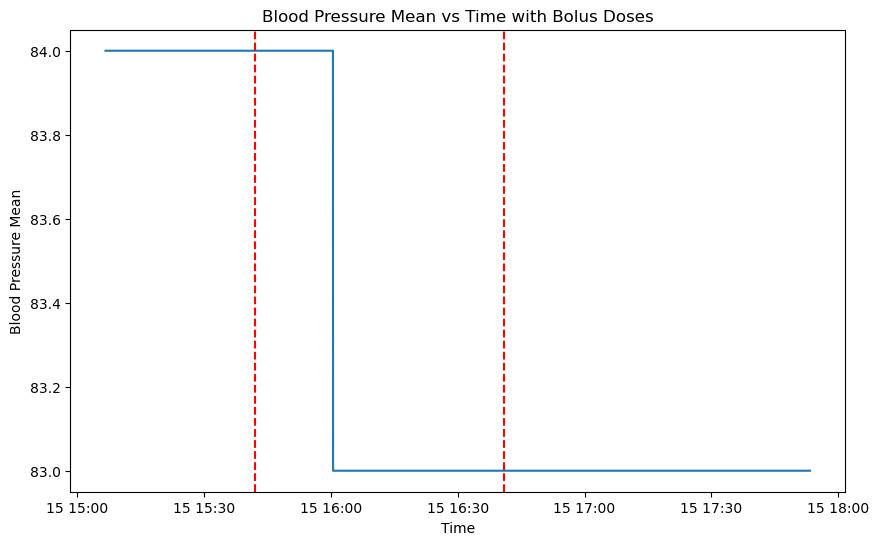

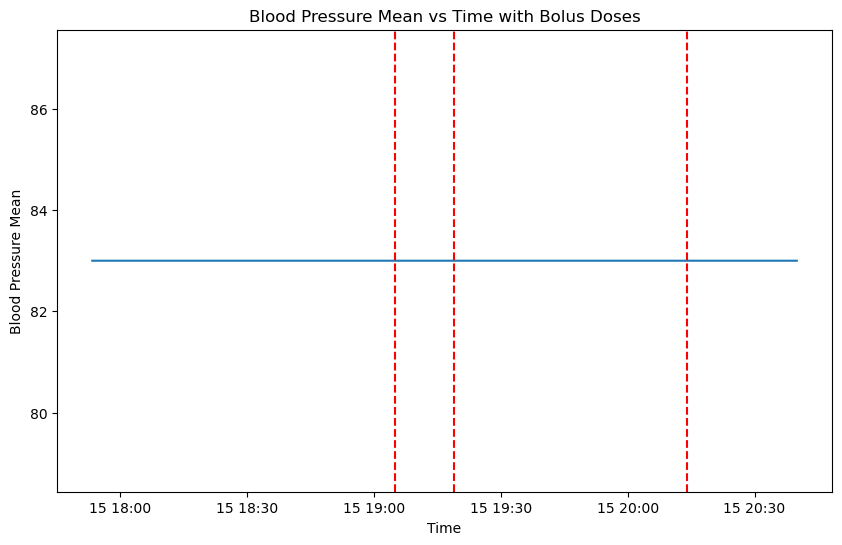

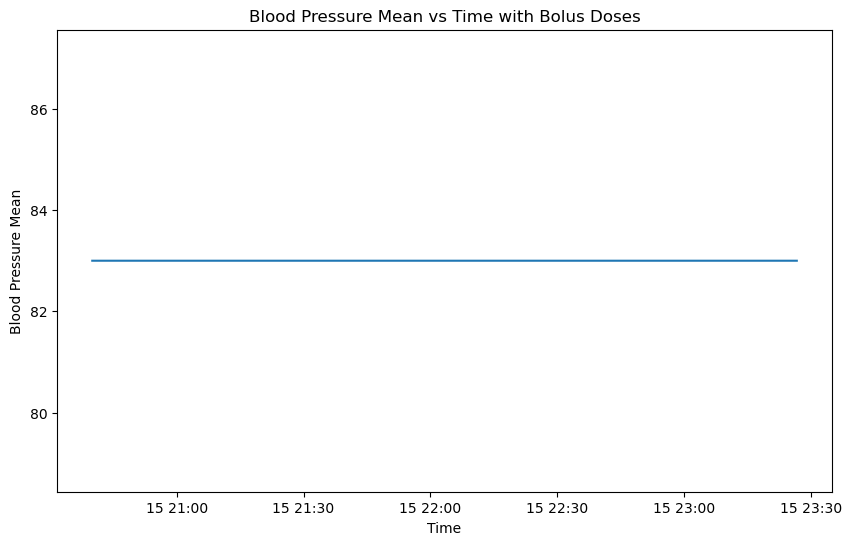

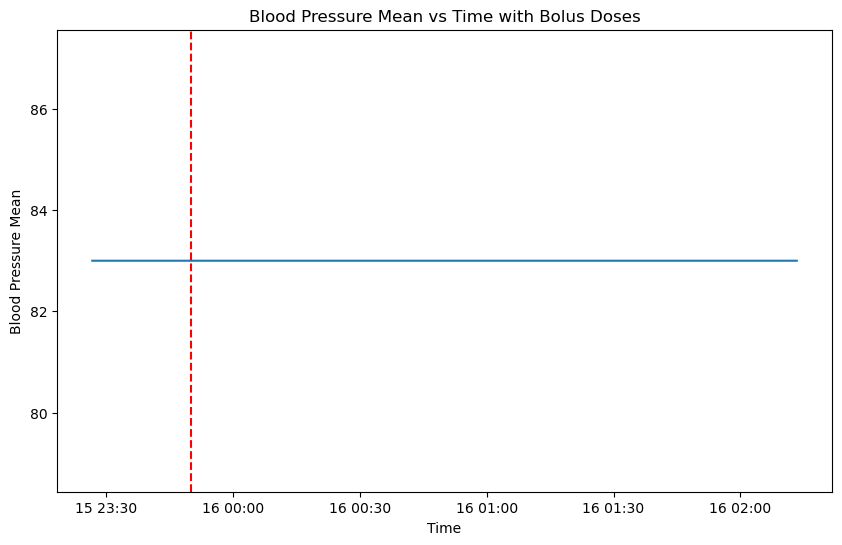

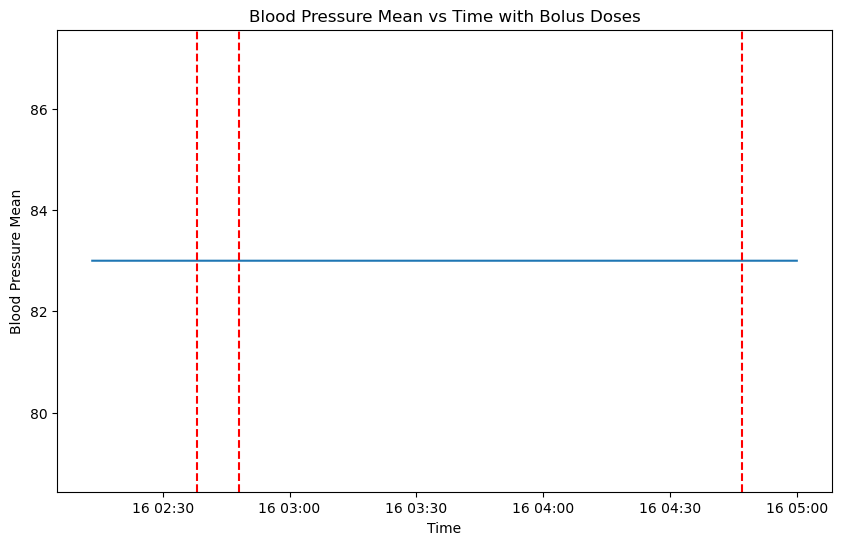

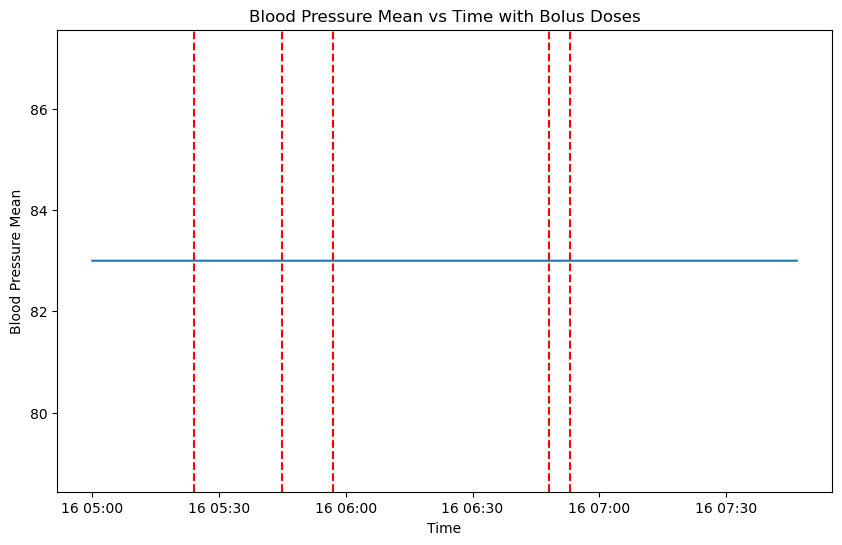

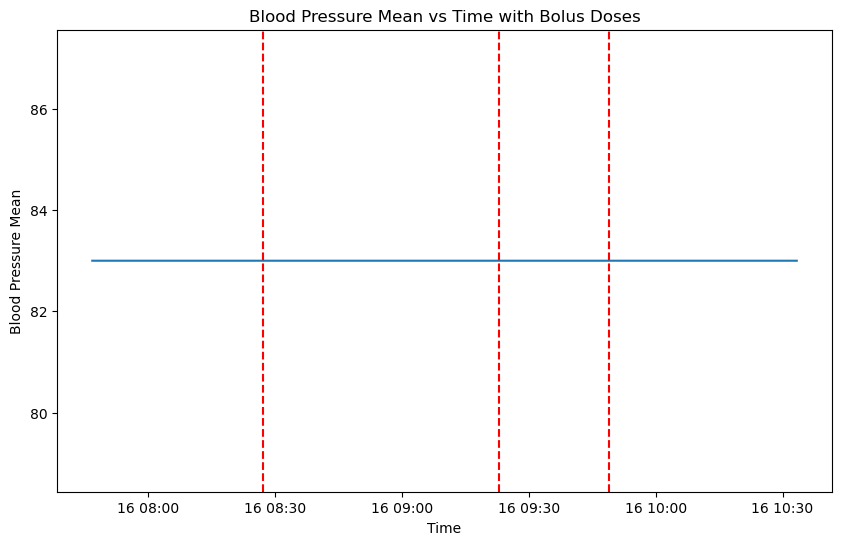

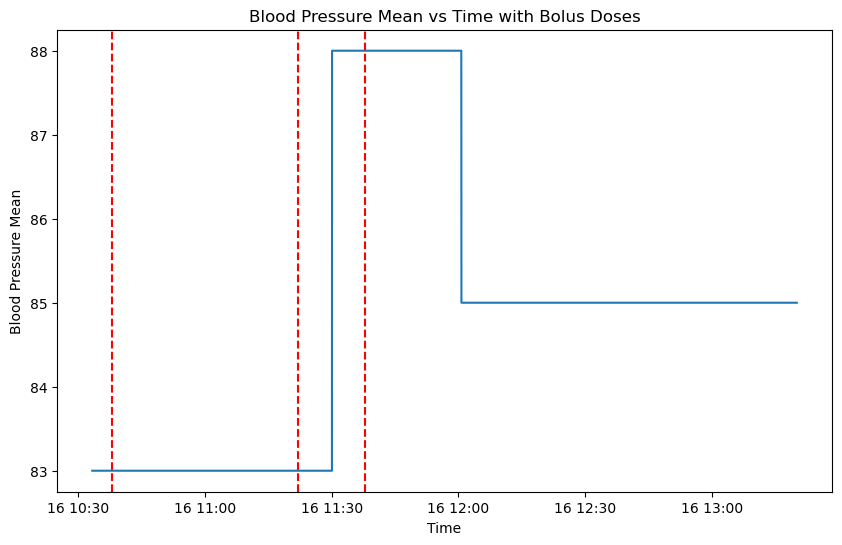

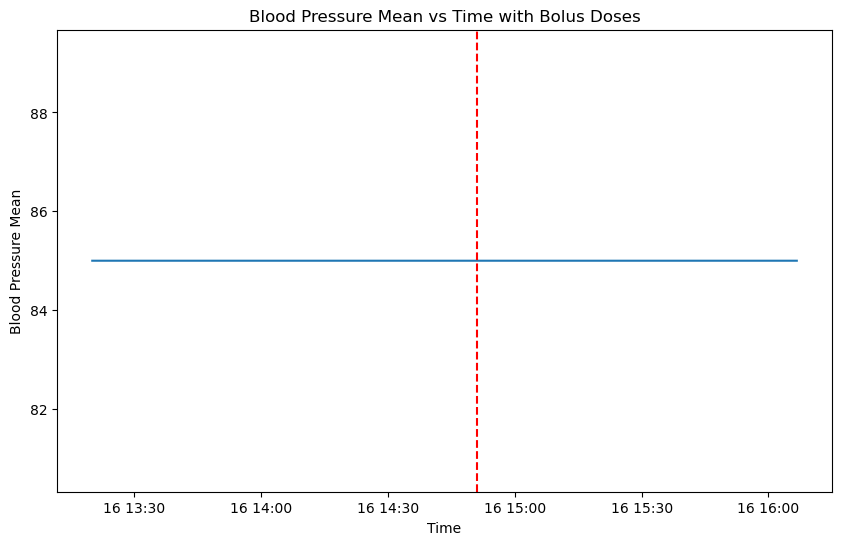

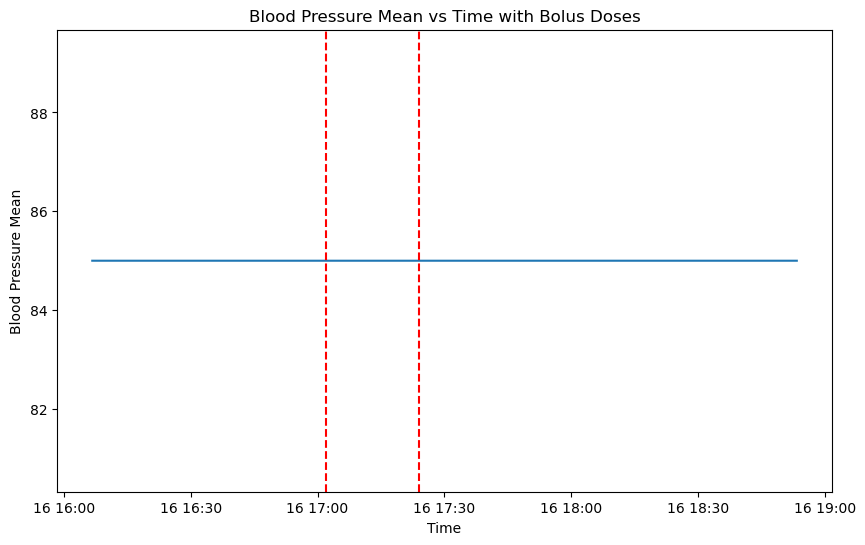

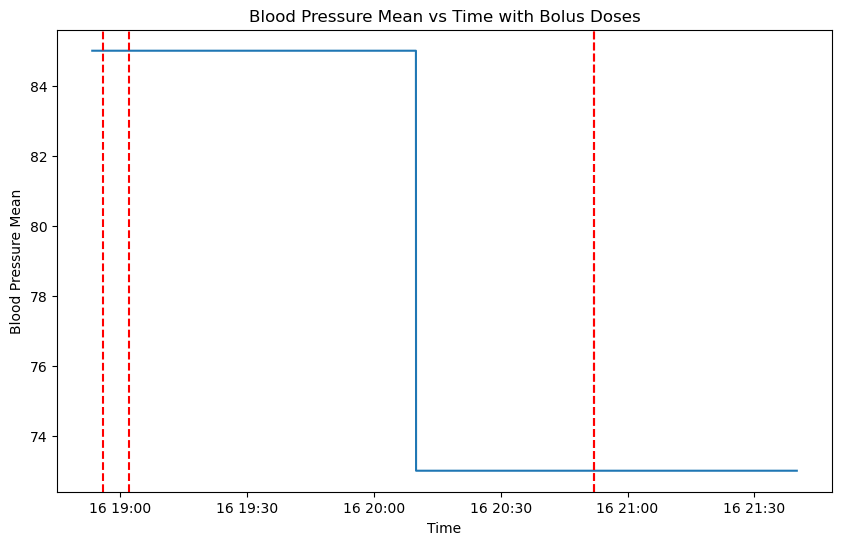

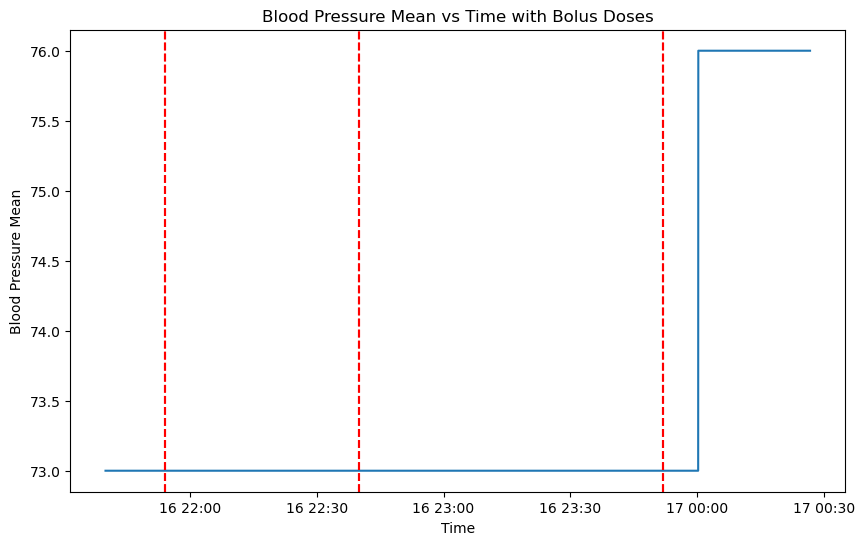

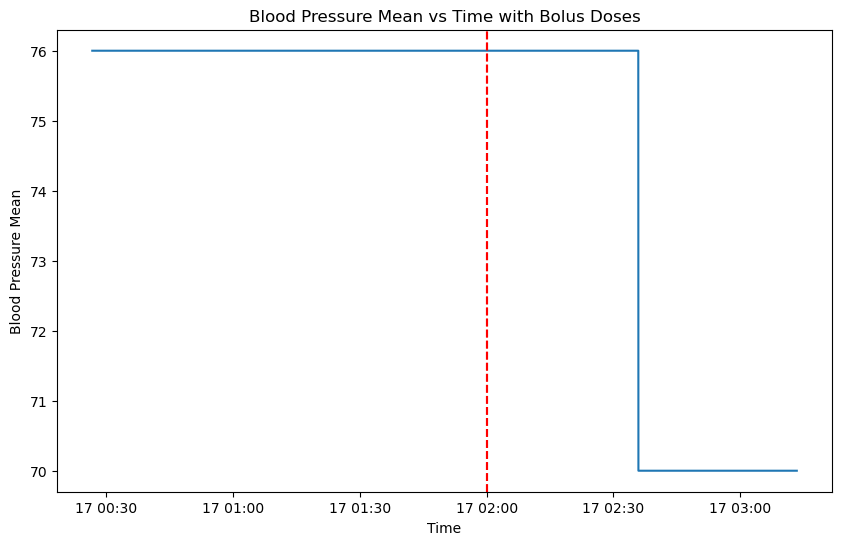

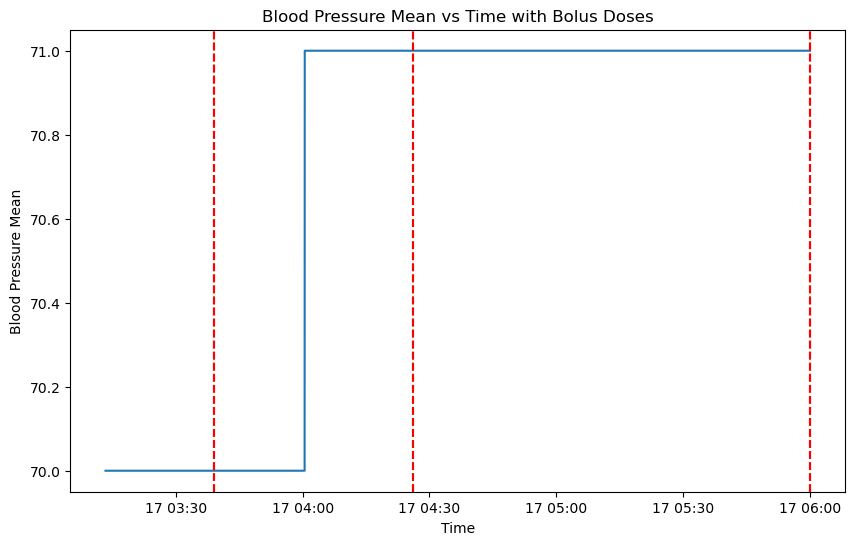

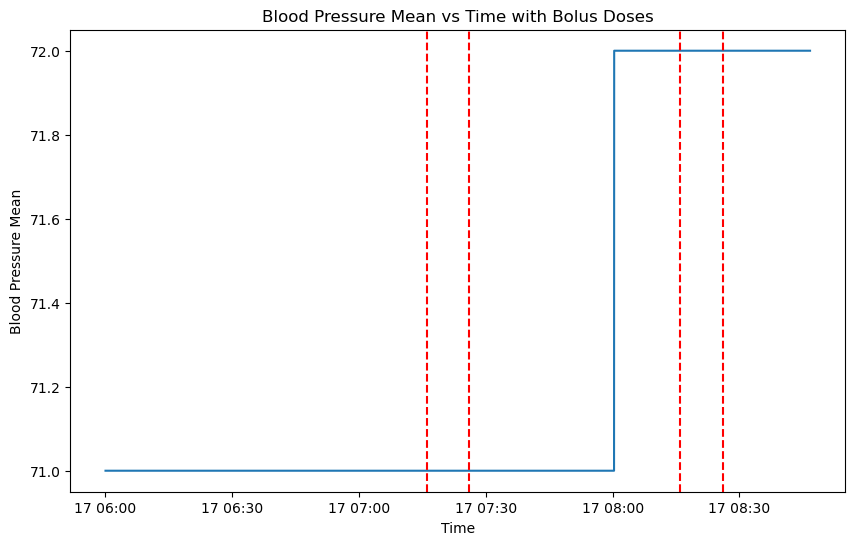

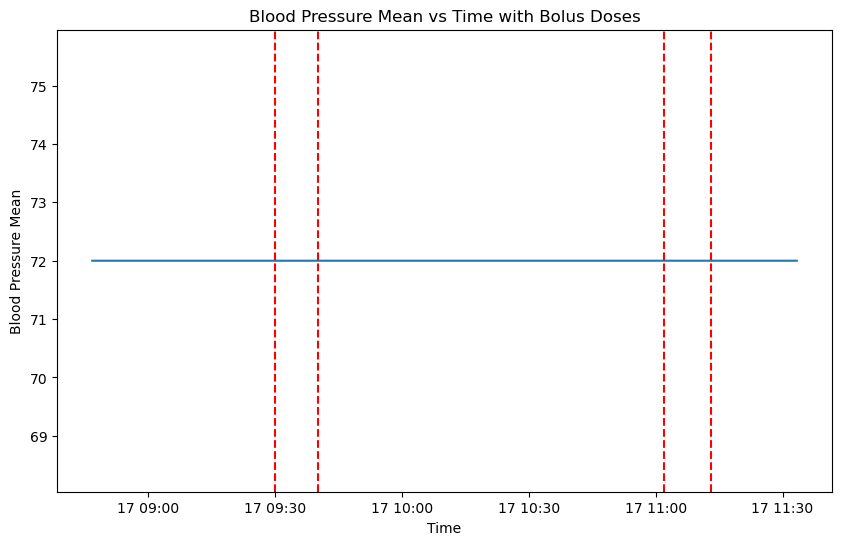

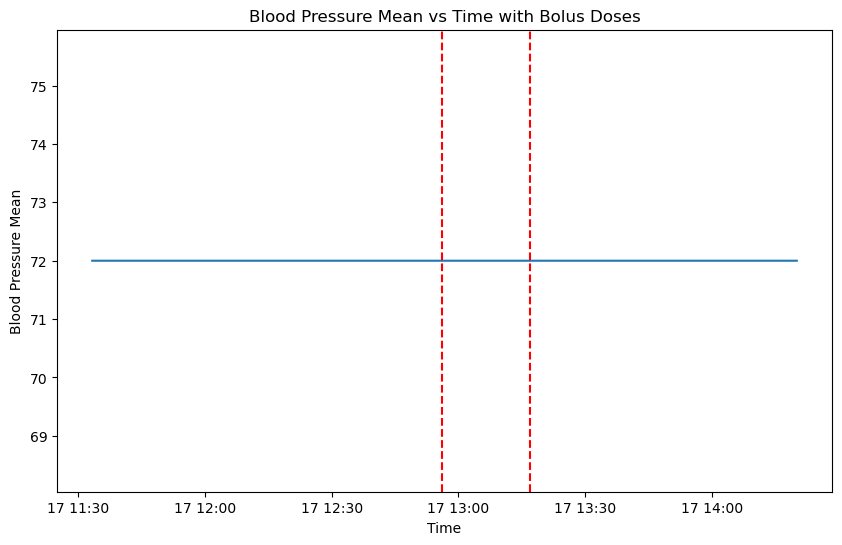

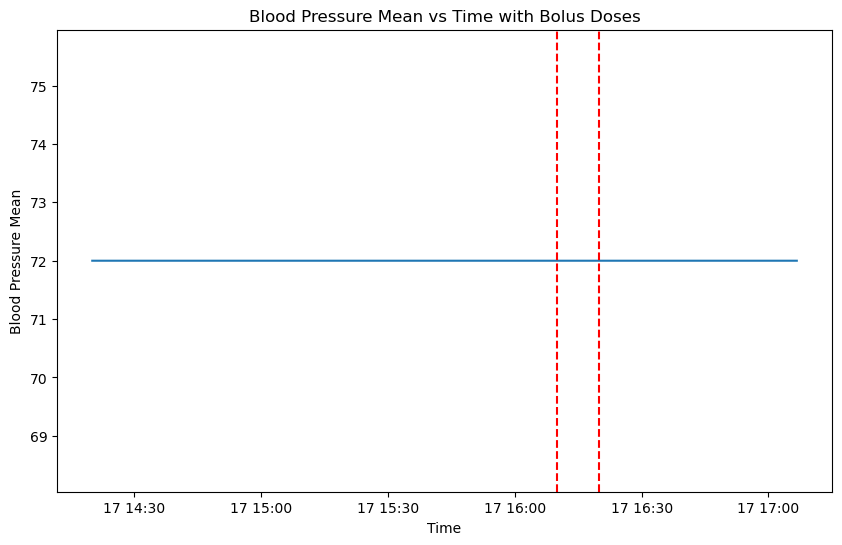

In [19]:
for i in range(0, len(accel9)-10000, 10000):
    start_sample = accel9['time'].iloc[i]
    end_sample = accel9['time'].iloc[i+10000]

    blood_pressure_mean_sample_sample = blood_pressure_mean_sample[(blood_pressure_mean_sample['time'] >= start_sample) & (blood_pressure_mean_sample['time'] <= end_sample)]
    bolus_sample = bolus[(bolus['time'] >= start_sample) & (bolus['time'] <= end_sample)]

    plt.figure(figsize=(10, 6))
    plt.plot(blood_pressure_mean_sample_sample['time'], blood_pressure_mean_sample_sample['blood_pressure_mean'])
    for bolus_time in bolus_sample['time']:
        plt.axvline(x=bolus_time, color='red', linestyle='--')
    plt.title('Blood Pressure Mean vs Time with Bolus Doses')
    plt.xlabel('Time')
    plt.ylabel('Blood Pressure Mean')
    plt.show()

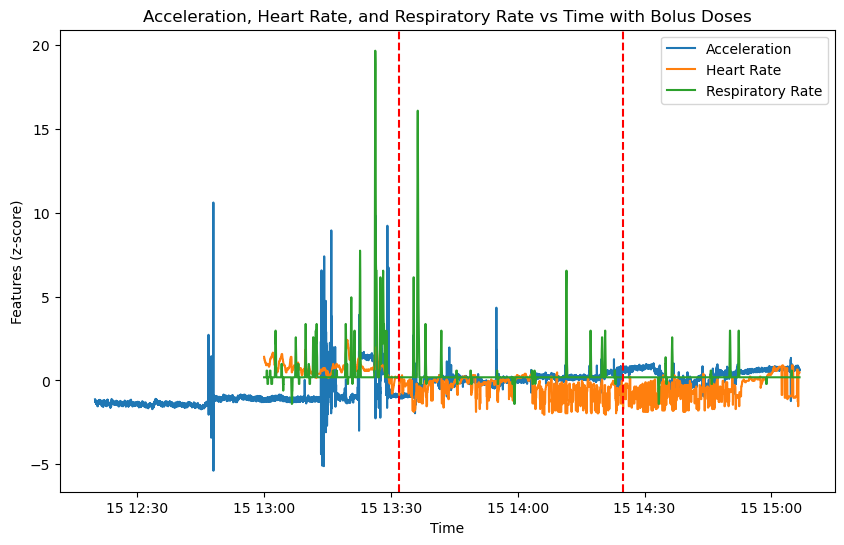

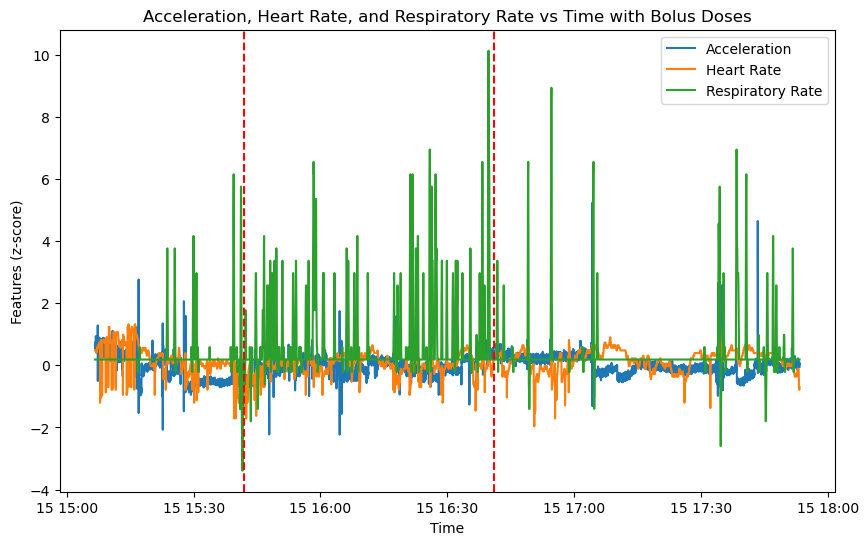

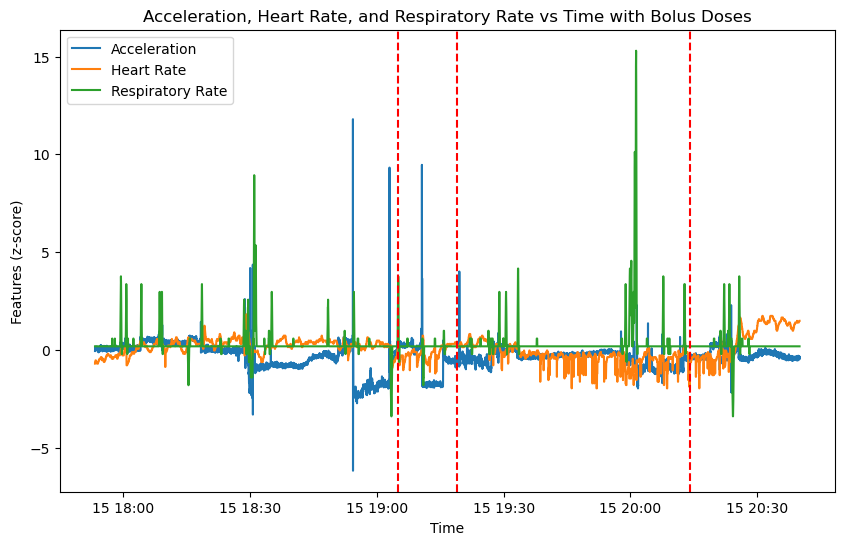

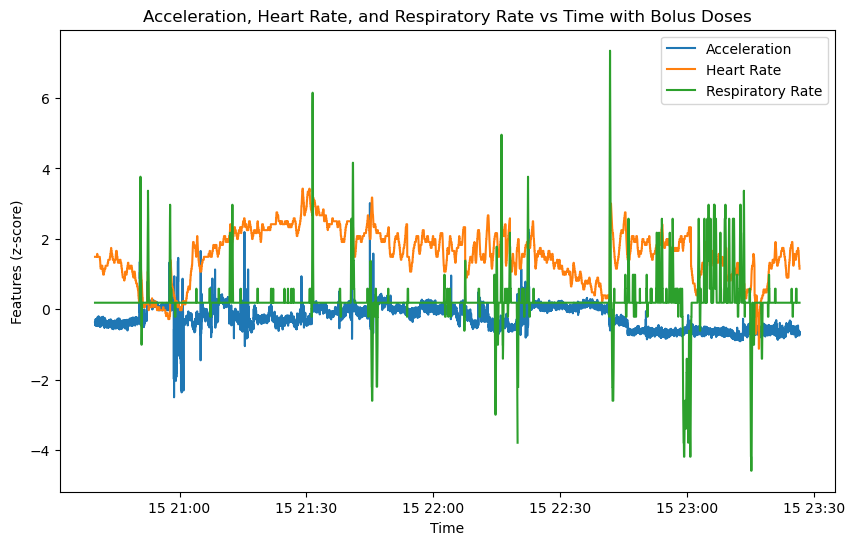

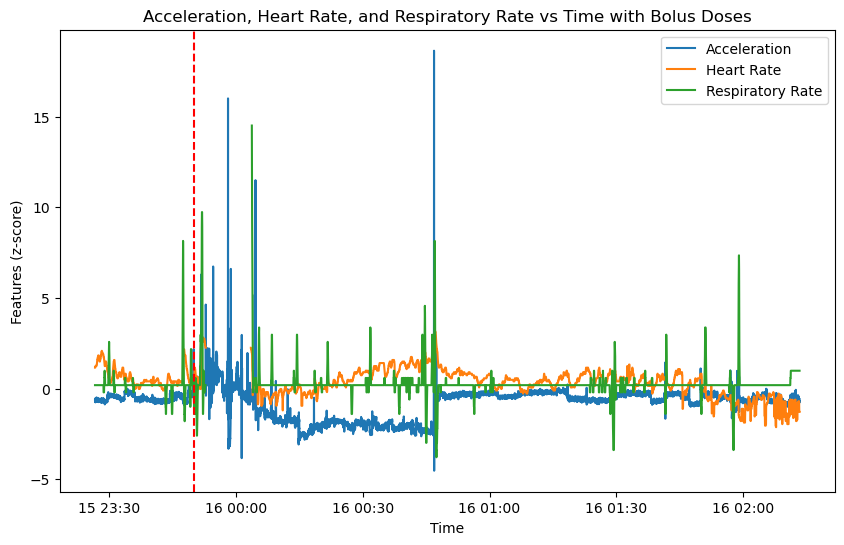

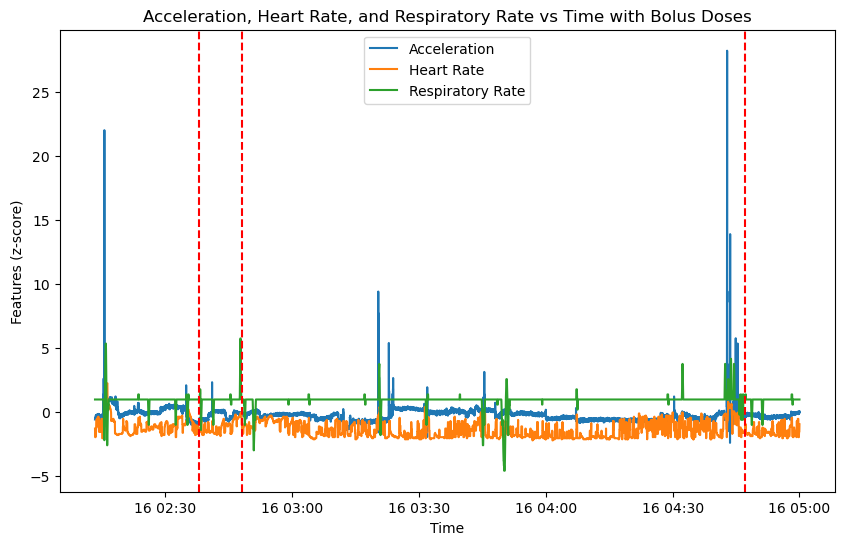

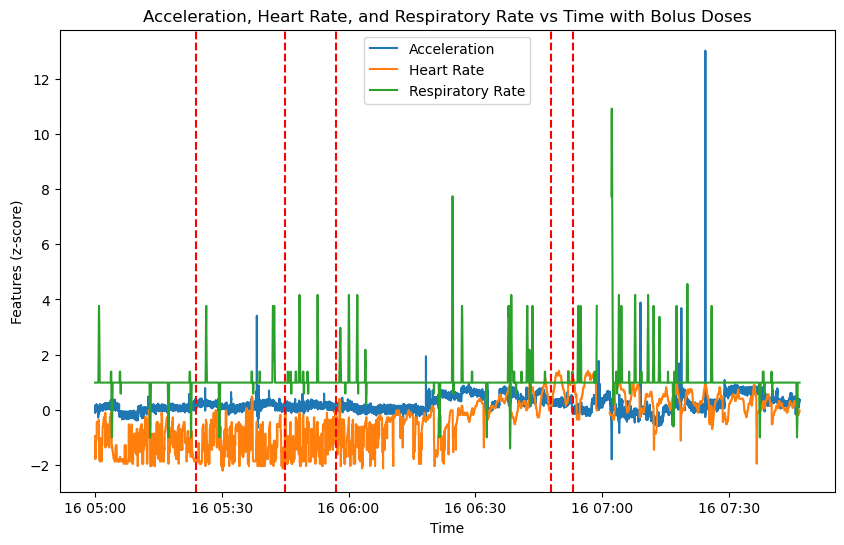

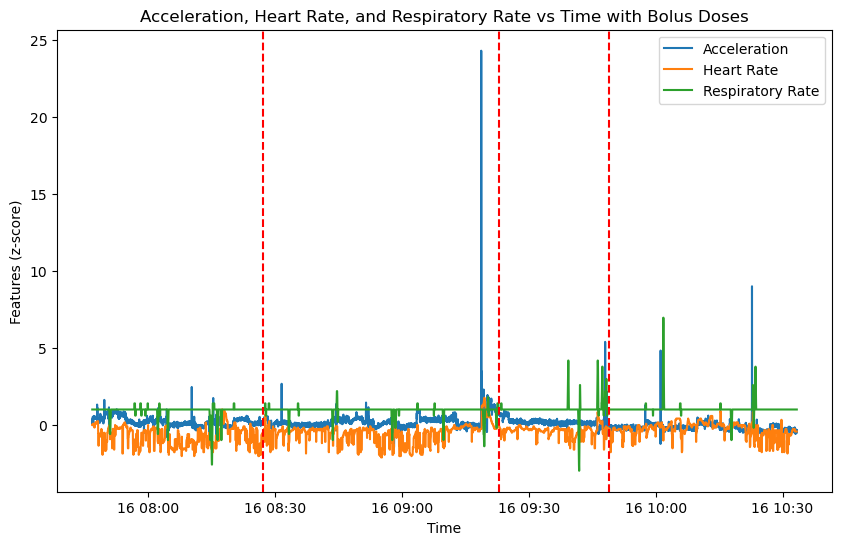

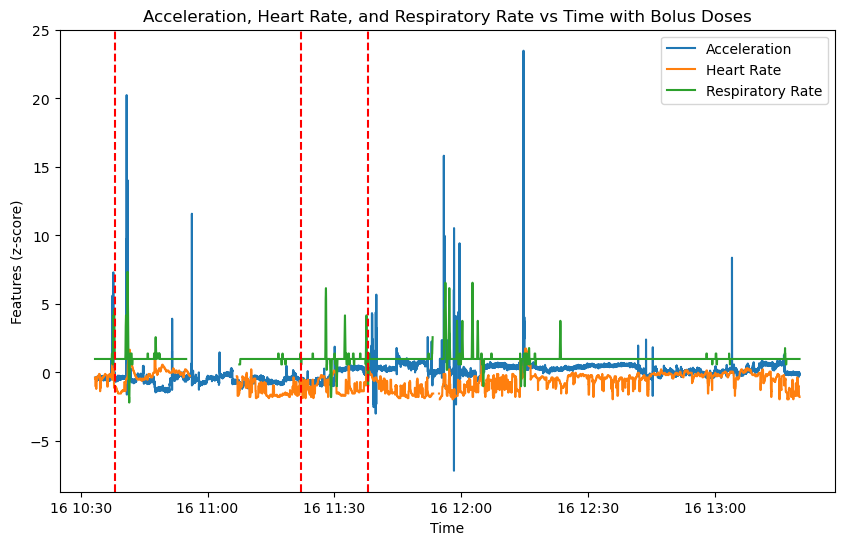

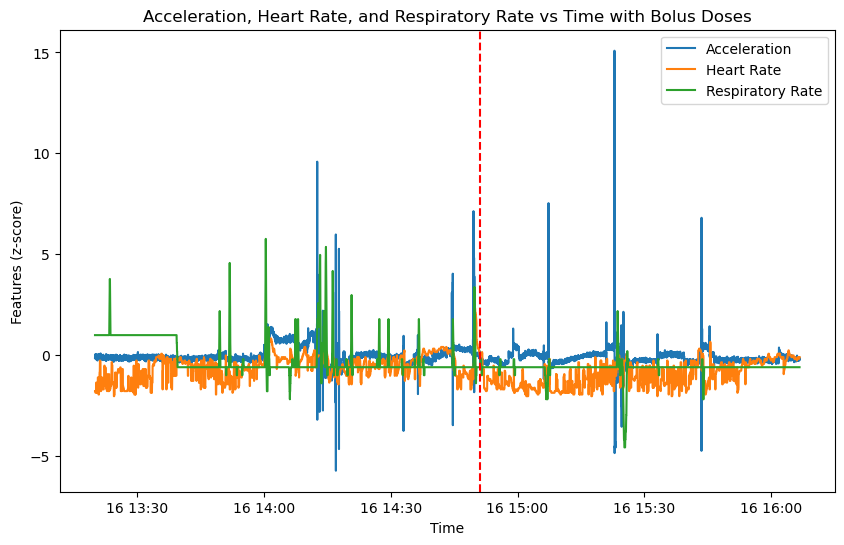

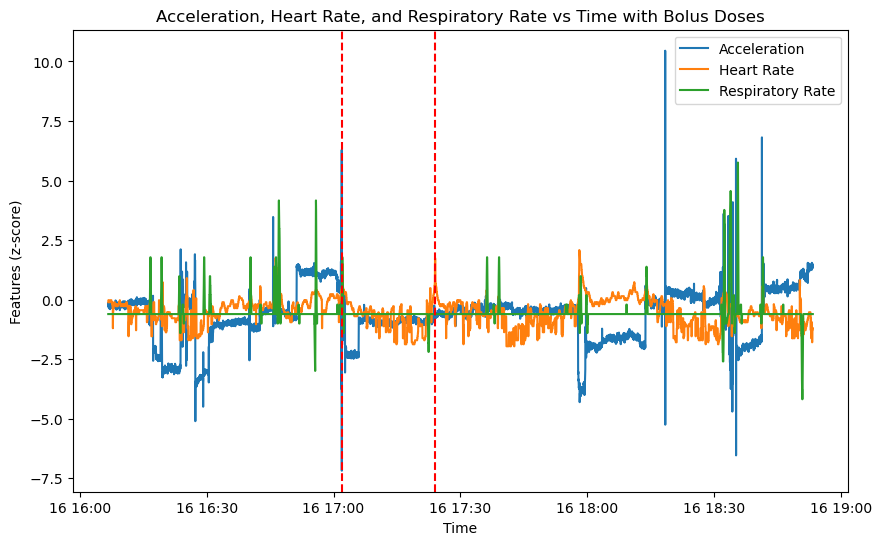

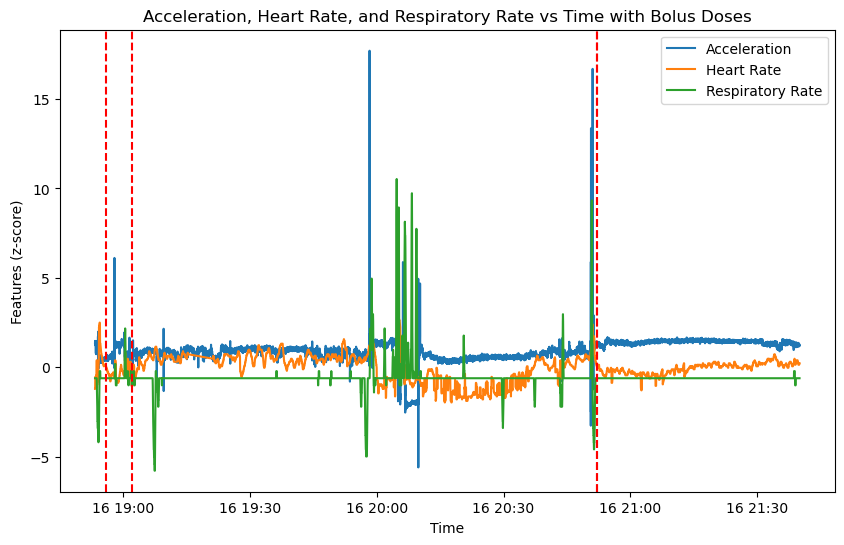

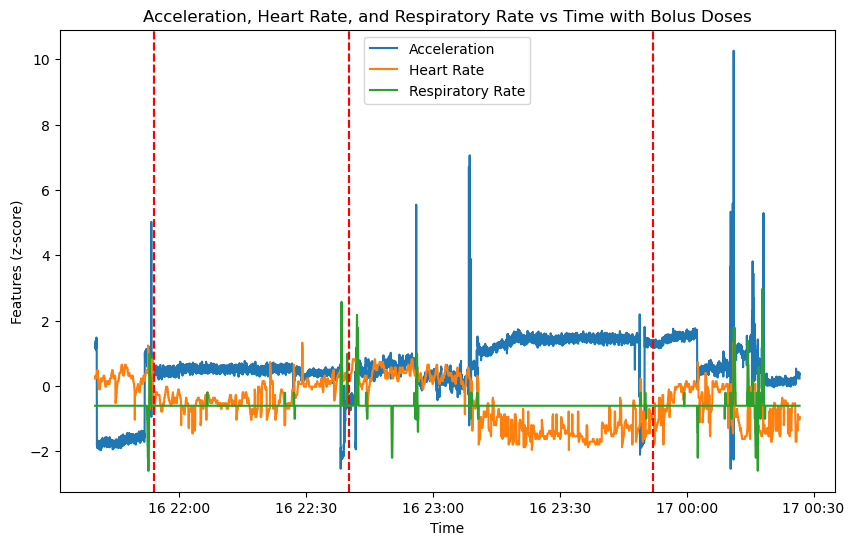

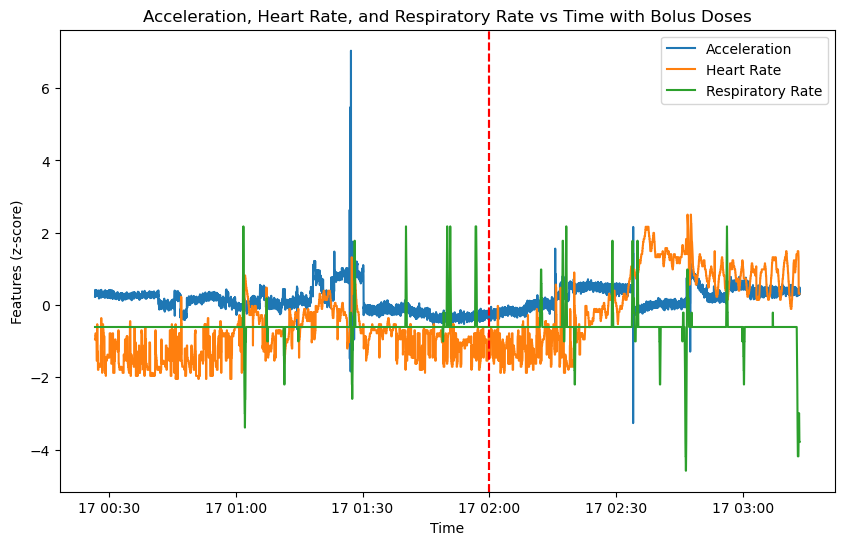

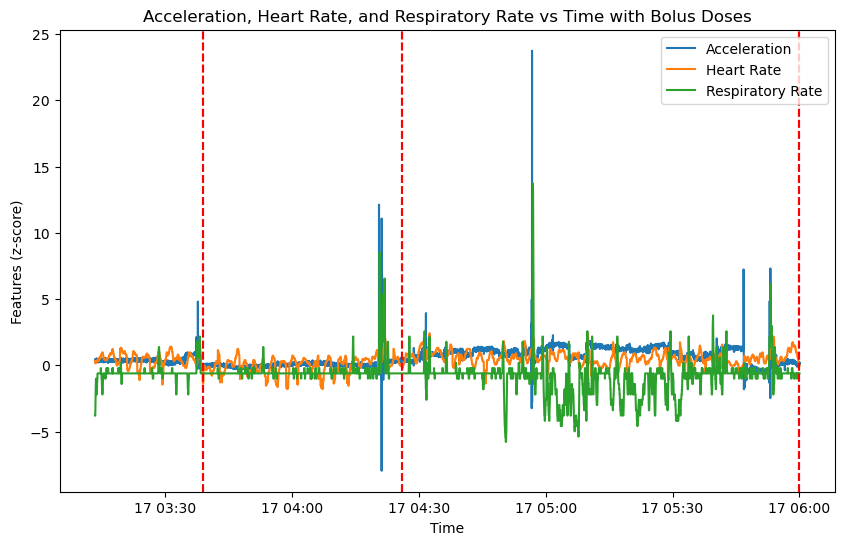

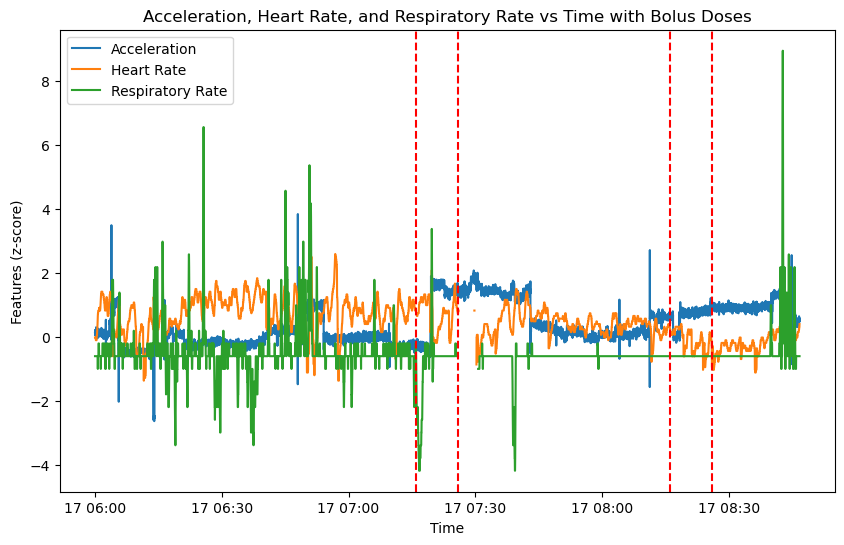

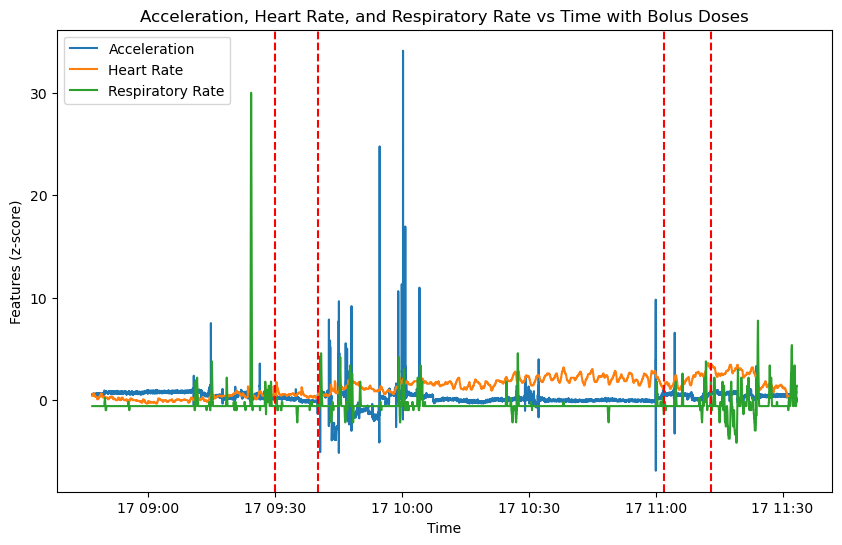

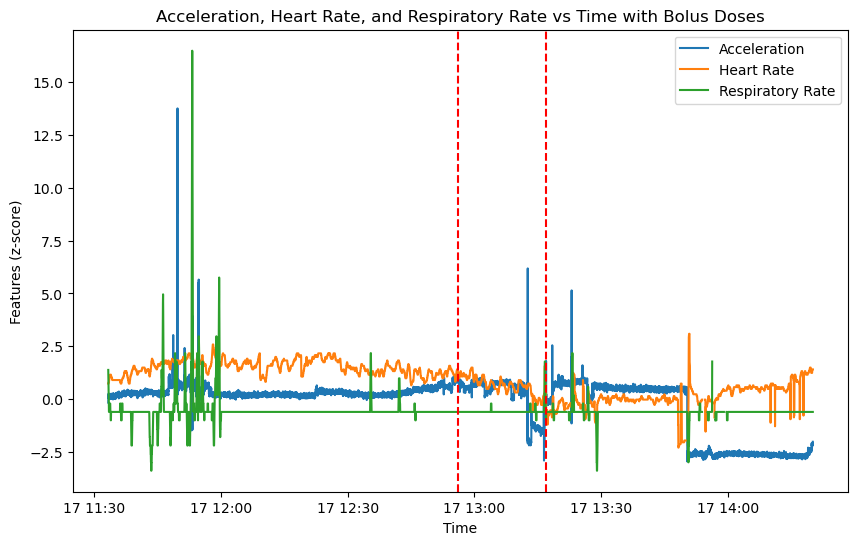

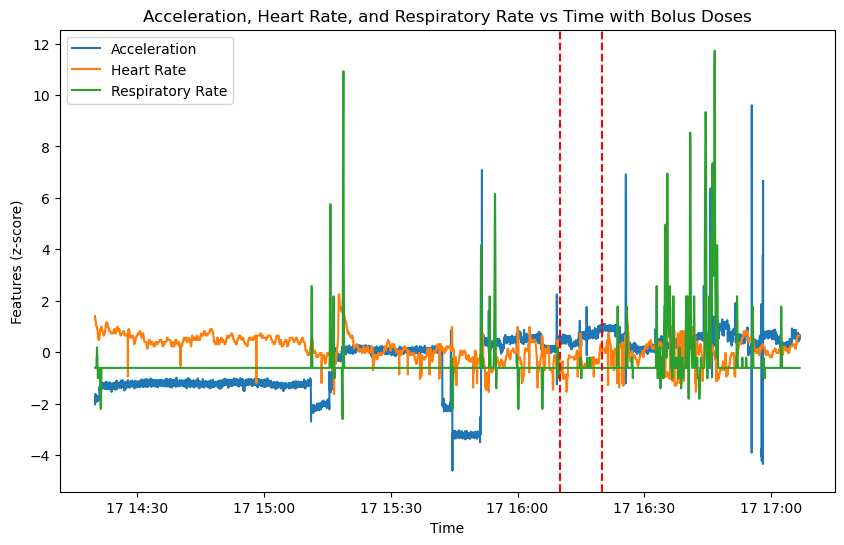

In [20]:
for i in range(0, len(accel9)-10000, 10000):
    start_sample = accel9['time'].iloc[i]
    end_sample = accel9['time'].iloc[i+10000]

    accel9_sample_standardized_sample = accel9_sample_standardized[(accel9_sample_standardized['time'] >= start_sample) & (accel9_sample_standardized['time'] <= end_sample)]
    heart_rate_sample_standardized_sample = heart_rate_sample_standardized[(heart_rate_sample_standardized['time'] >= start_sample) & (heart_rate_sample_standardized['time'] <= end_sample)]
    respiratory_rate_sample_standardized_sample = respiratory_rate_sample_standardized[(respiratory_rate_sample_standardized['time'] >= start_sample) & (respiratory_rate_sample_standardized['time'] <= end_sample)]
    bolus_sample = bolus[(bolus['time'] >= start_sample) & (bolus['time'] <= end_sample)]

    plt.figure(figsize=(10, 6))
    plt.plot(accel9_sample_standardized_sample['time'], accel9_sample_standardized_sample['a'])
    plt.plot(heart_rate_sample_standardized_sample['time'], heart_rate_sample_standardized_sample['heart_rate'])
    plt.plot(respiratory_rate_sample_standardized_sample['time'], respiratory_rate_sample_standardized_sample['respiratory_rate'])
    for bolus_time in bolus_sample['time']:
        plt.axvline(x=bolus_time, color='red', linestyle='--')
    plt.legend(['Acceleration', 'Heart Rate', 'Respiratory Rate'])
    plt.title('Acceleration, Heart Rate, and Respiratory Rate vs Time with Bolus Doses')
    plt.xlabel('Time')
    plt.ylabel('Features (z-score)')
    plt.show()

In [21]:
filtered_mar9 = filtered_mar9.reset_index(drop=True)
print(filtered_mar9)

                   time  dose   mar_action  \
0   2024-01-12 19:00:00   9.9    ['Given']   
1   2024-01-12 19:01:00  20.0    ['Given']   
2   2024-01-12 19:09:00   0.5  ['New Bag']   
3   2024-01-12 19:15:00   1.0  ['New Bag']   
4   2024-01-12 19:19:00   0.3  ['New Bag']   
..                  ...   ...          ...   
801 2024-01-30 20:01:00   0.8    ['Given']   
802 2024-01-31 09:24:00   0.8    ['Given']   
803 2024-01-31 20:08:00   0.8    ['Given']   
804 2024-02-01 20:24:00   0.8    ['Given']   
805 2024-02-07 08:19:00   5.0    ['Given']   

                                            med_name  
0      ['DEXMEDETOMIDINE BOLUS FROM BAG (JHH PEDS)']  
1         ['PROPOFOL 10 MG/ML INTRAVENOUS EMULSION']  
2          ['FENTANYL INFUSION 50 MCG/ML (JHH PED)']  
3          ['FENTANYL INFUSION 50 MCG/ML (JHH PED)']  
4    ['DEXMEDETOMIDINE INFUSION 4 MCG/ML (JHH PED)']  
..                                               ...  
801     ['METHADONE 5 MG/5 ML ORAL SOLUTION (UBER)']  
802    

In [22]:
narcotics = ['fentanyl', 'morphine', 'hydromorphone', 'oxycodone', 'methadone', 'remifentanil']
paralytics = ['rocuronium', 'vecuronium', 'succinylcholine', 'cisatracurium']
alpha_agonists = ['dexmedetomidine', 'clonidine']
ketamines = ['ketamine']
propofols = ['propofol']
etomidates = ['etomidate']
benzodiazepines = ['midazolam', 'diazepam', 'lorazepam']

narcotics_pattern = '|'.join(narcotics)
paralytics_pattern = '|'.join(paralytics)
alpha_agonists_pattern = '|'.join(alpha_agonists)
ketamines_pattern = '|'.join(ketamines)
propofols_pattern = '|'.join(propofols)
etomidates_pattern = '|'.join(etomidates)
benzodiazepines_pattern = '|'.join(benzodiazepines)

filtered_mar9_narcotics = filtered_mar9[filtered_mar9['med_name'].str.lower().str.contains(narcotics_pattern, regex=True)].reset_index(drop=True)
filtered_mar9_paralytics = filtered_mar9[filtered_mar9['med_name'].str.lower().str.contains(paralytics_pattern, regex=True)].reset_index(drop=True)
filtered_mar9_alpha_agonists = filtered_mar9[filtered_mar9['med_name'].str.lower().str.contains(alpha_agonists_pattern, regex=True)].reset_index(drop=True)
filtered_mar9_ketamines = filtered_mar9[filtered_mar9['med_name'].str.lower().str.contains(ketamines_pattern, regex=True)].reset_index(drop=True)
filtered_mar9_propofols = filtered_mar9[filtered_mar9['med_name'].str.lower().str.contains(propofols_pattern, regex=True)].reset_index(drop=True)
filtered_mar9_etomidates = filtered_mar9[filtered_mar9['med_name'].str.lower().str.contains(etomidates_pattern, regex=True)].reset_index(drop=True)
filtered_mar9_benzodiazepines = filtered_mar9[filtered_mar9['med_name'].str.lower().str.contains(benzodiazepines_pattern, regex=True)].reset_index(drop=True)

In [23]:
print(filtered_mar9_narcotics.shape)
print(filtered_mar9_paralytics.shape)
print(filtered_mar9_alpha_agonists.shape)
print(filtered_mar9_ketamines.shape)
print(filtered_mar9_propofols.shape)
print(filtered_mar9_etomidates.shape)
print(filtered_mar9_benzodiazepines.shape)

(414, 4)
(0, 4)
(44, 4)
(9, 4)
(41, 4)
(0, 4)
(290, 4)


In [24]:
benzodiazepine_equivs = {
    'midazolam': 5,
    'diazepam': 2.5,
    'lorazepam': 1
}

equivs = []
orals = []

for row in filtered_mar9_benzodiazepines.itertuples():
    med_name_lower = row.med_name.lower()
    if 'midazolam' in med_name_lower:
        equiv = row.dose * benzodiazepine_equivs['midazolam']
    elif 'diazepam' in med_name_lower:
        equiv = row.dose * benzodiazepine_equivs['diazepam']
    elif 'lorazepam' in med_name_lower:
        equiv = row.dose * benzodiazepine_equivs['lorazepam']
    else:
        equiv = -1  # Assign -1 for unknown medications

    if 'oral' in med_name_lower:
        oral = True
    else:
        oral = False

    equivs.append(equiv)
    orals.append(oral)

filtered_mar9_benzodiazepines['equivs'] = equivs
filtered_mar9_benzodiazepines['oral'] = orals

print(filtered_mar9_benzodiazepines)


                   time  dose mar_action  \
0   2024-01-13 00:40:00   1.0  ['Given']   
1   2024-01-13 05:15:00   1.0  ['Given']   
2   2024-01-13 15:05:00   1.0  ['Given']   
3   2024-01-13 21:03:00   1.0  ['Given']   
4   2024-01-14 06:36:00   1.0  ['Given']   
..                  ...   ...        ...   
285 2024-01-25 10:36:00   2.0  ['Given']   
286 2024-01-25 18:06:00   2.0  ['Given']   
287 2024-01-26 02:13:00   2.0  ['Given']   
288 2024-01-26 14:13:00   2.0  ['Given']   
289 2024-01-27 02:03:00   2.0  ['Given']   

                                           med_name  equivs   oral  
0      ['MIDAZOLAM 1 MG/ML INJECTION SOLUTION JHM']     5.0  False  
1      ['MIDAZOLAM 1 MG/ML INJECTION SOLUTION JHM']     5.0  False  
2      ['MIDAZOLAM 1 MG/ML INJECTION SOLUTION JHM']     5.0  False  
3      ['MIDAZOLAM 1 MG/ML INJECTION SOLUTION JHM']     5.0  False  
4      ['MIDAZOLAM 1 MG/ML INJECTION SOLUTION JHM']     5.0  False  
..                                              ...     .

In [25]:
start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

midazolam_df = filtered_mar9_benzodiazepines[filtered_mar9_benzodiazepines['med_name'].str.lower().str.contains('midazolam')].reset_index(drop=True)
midazolam_df = midazolam_df[(midazolam_df['time'] >= start) & (midazolam_df['time'] <= end)]
midazolam_rate = pd.DataFrame({'time': pd.date_range(start=start, end=end, freq='T')})

diazepam_df = filtered_mar9_benzodiazepines[filtered_mar9_benzodiazepines['med_name'].str.lower().str.contains('diazepam')].reset_index(drop=True)
diazepam_df = diazepam_df[(diazepam_df['time'] >= start) & (diazepam_df['time'] <= end)]
diazepam_rate = pd.DataFrame({'time': pd.date_range(start=start, end=end, freq='T')})

lorazepam_df = filtered_mar9_benzodiazepines[filtered_mar9_benzodiazepines['med_name'].str.lower().str.contains('lorazepam')].reset_index(drop=True)
lorazepam_df = lorazepam_df[(lorazepam_df['time'] >= start) & (lorazepam_df['time'] <= end)]
lorazepam_rate = pd.DataFrame({'time': pd.date_range(start=start, end=end, freq='T')})

print(midazolam_df)
print(diazepam_df)
print(lorazepam_df)

                  time   dose       mar_action  \
9  2024-01-15 14:50:00  0.490        ['Given']   
10 2024-01-15 16:01:00  0.020      ['New Bag']   
11 2024-01-15 17:00:00  0.020  ['Rate Verify']   
12 2024-01-15 18:00:00  0.020  ['Rate Verify']   
13 2024-01-15 19:00:00  0.020  ['Rate Verify']   
..                 ...    ...              ...   
85 2024-01-17 14:00:00  0.030  ['Rate Verify']   
86 2024-01-17 15:00:00  0.030  ['Rate Verify']   
87 2024-01-17 16:00:00  0.030  ['Rate Verify']   
88 2024-01-17 16:20:00  0.591        ['Given']   
89 2024-01-17 17:00:00  0.030  ['Rate Verify']   

                                        med_name  equivs   oral  
9   ['MIDAZOLAM 1 MG/ML INJECTION SOLUTION JHM']   2.450  False  
10      ['MIDAZOLAM INFUSION 1 MG/ML (JHH PED)']   0.100  False  
11      ['MIDAZOLAM INFUSION 1 MG/ML (JHH PED)']   0.100  False  
12      ['MIDAZOLAM INFUSION 1 MG/ML (JHH PED)']   0.100  False  
13      ['MIDAZOLAM INFUSION 1 MG/ML (JHH PED)']   0.100  False  
.. 

In [26]:
def calculate_doses(df):
    """
    Calculate the doses of continuous and bolus medications over time.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing time, dose, and mar_action columns.

    Returns:
        pd.DataFrame: DataFrame with time, dose, continuous_dose, and bolus_dose columns.
    """
    dose_df = pd.DataFrame({'time': pd.date_range(start=df['time'].iloc[0], end=df['time'].iloc[-1], freq='T')})

    doses = []
    continuous_doses = []
    bolus_doses = []

    index = 0
    continuous_dose = 0

    for i in range(len(dose_df)):
        bolus_dose = 0

        if dose_df['time'].iloc[i] == df['time'].iloc[index]:
            if 'Given' in df['mar_action'].iloc[index]:
                bolus_dose = df['dose'].iloc[index]
            else:
                continuous_dose = df['dose'].iloc[index] / 60
            index += 1
        
        rate = continuous_dose + bolus_dose
        doses.append(rate)
        continuous_doses.append(continuous_dose)
        bolus_doses.append(bolus_dose)

    dose_df['dose'] = doses
    dose_df['continuous_dose'] = continuous_doses
    dose_df['bolus_dose'] = bolus_doses

    return dose_df

In [27]:
midazolam_doses = calculate_doses(midazolam_df)
diazepam_doses = calculate_doses(diazepam_df)
# lorazepam_doses = calculate_doses(lorazepam_df)

In [40]:
benzodiazepine_half_lives = {
    'midazolam': 1.3,
    'diazepam': 18,
    'lorazepam': 14
}

benzodiazepine_elimination_rates = {med: np.log(2) / (half_life * 60) for med, half_life in benzodiazepine_half_lives.items()}

def calculate_concentrations(df, elimination_rate, start_time=None, end_time=None):
    """
    Calculate the drug concentration over time based on the elimination rate and dosing regimen.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing time and dose information.
        elimination_rate (float): The elimination rate of the drug.
        start_time (str): Start time for the calculation (optional).
        end_time (str): End time for the calculation (optional).
    
    Returns:
        pd.DataFrame: DataFrame with calculated drug concentrations over time.
    """
    if start_time is None:
        start_time = df['time'].iloc[0]
    if end_time is None:
        end_time = df['time'].iloc[-1]
    
    concentration_df = pd.DataFrame({'time': pd.date_range(start=start_time, end=end_time, freq='T')})
    concentration_df = concentration_df.merge(df[['time', 'dose', 'continuous_dose', 'bolus_dose']], on='time', how='left')
    concentration_df[['dose', 'continuous_dose', 'bolus_dose']] = concentration_df[['dose', 'continuous_dose', 'bolus_dose']].fillna(0)

    concentrations = [concentration_df['dose'].iloc[0]]

    for i in range(1, len(concentration_df)):
        concentration = concentration_df['dose'].iloc[i] + np.exp(-elimination_rate) * concentrations[-1]
        concentrations.append(concentration)

    concentration_df['concentration'] = concentrations

    return concentration_df

In [47]:
midazolam_concentrations = calculate_concentrations(midazolam_doses, benzodiazepine_elimination_rates['midazolam'], start, end)
diazepam_concentrations = calculate_concentrations(diazepam_doses, benzodiazepine_elimination_rates['diazepam'], start, end)

equiv_concentrations = (
    midazolam_concentrations['concentration'] * benzodiazepine_equivs['midazolam'] +
    diazepam_concentrations['concentration'] * benzodiazepine_equivs['diazepam'])

equiv_concentrations = pd.DataFrame({'time': midazolam_concentrations['time'], 'concentration': equiv_concentrations})

print(midazolam_concentrations)
print(diazepam_concentrations)
print(equiv_concentrations)

                    time  dose  continuous_dose  bolus_dose  concentration
0    2024-01-15 12:20:00   0.0              0.0         0.0       0.000000
1    2024-01-15 12:21:00   0.0              0.0         0.0       0.000000
2    2024-01-15 12:22:00   0.0              0.0         0.0       0.000000
3    2024-01-15 12:23:00   0.0              0.0         0.0       0.000000
4    2024-01-15 12:24:00   0.0              0.0         0.0       0.000000
...                  ...   ...              ...         ...            ...
3182 2024-01-17 17:22:00   0.0              0.0         0.0       0.030986
3183 2024-01-17 17:23:00   0.0              0.0         0.0       0.030712
3184 2024-01-17 17:24:00   0.0              0.0         0.0       0.030440
3185 2024-01-17 17:25:00   0.0              0.0         0.0       0.030171
3186 2024-01-17 17:26:00   0.0              0.0         0.0       0.029904

[3187 rows x 5 columns]
                    time  dose  continuous_dose  bolus_dose  concentration


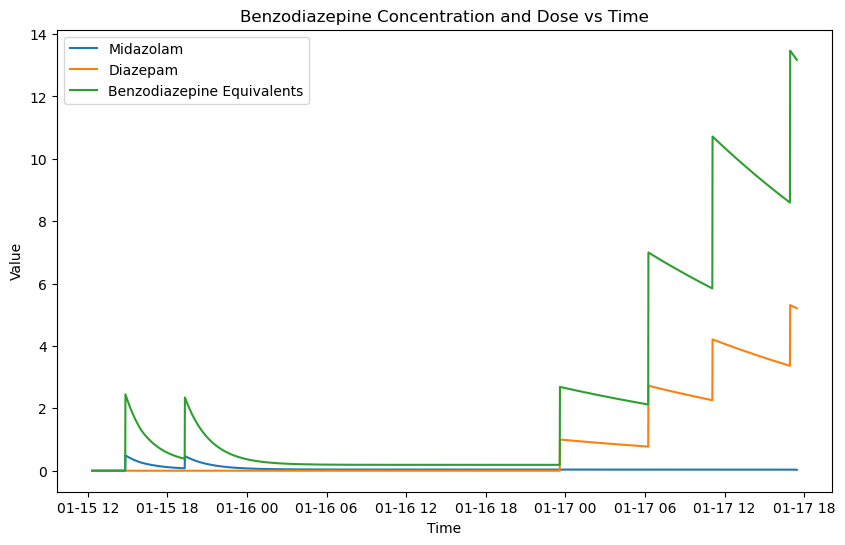

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(midazolam_concentrations['time'], midazolam_concentrations['concentration'], label='Midazolam')
plt.plot(diazepam_concentrations['time'], diazepam_concentrations['concentration'], label='Diazepam')
plt.plot(equiv_concentrations['time'], equiv_concentrations['concentration'], label='Benzodiazepine Equivalents')
plt.title('Benzodiazepine Concentration and Dose vs Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

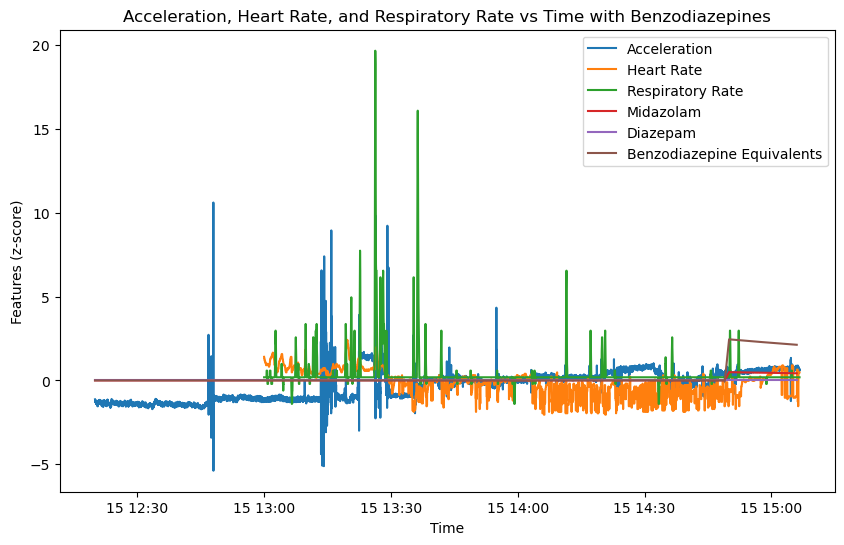

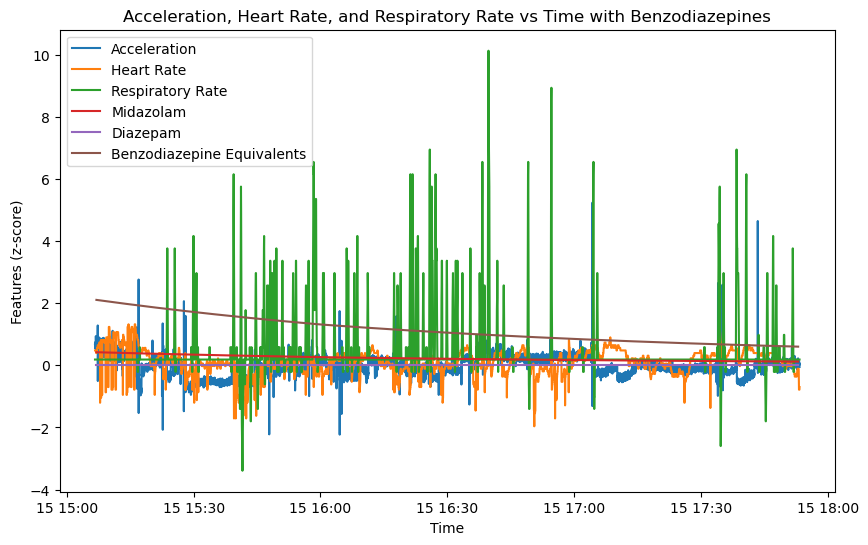

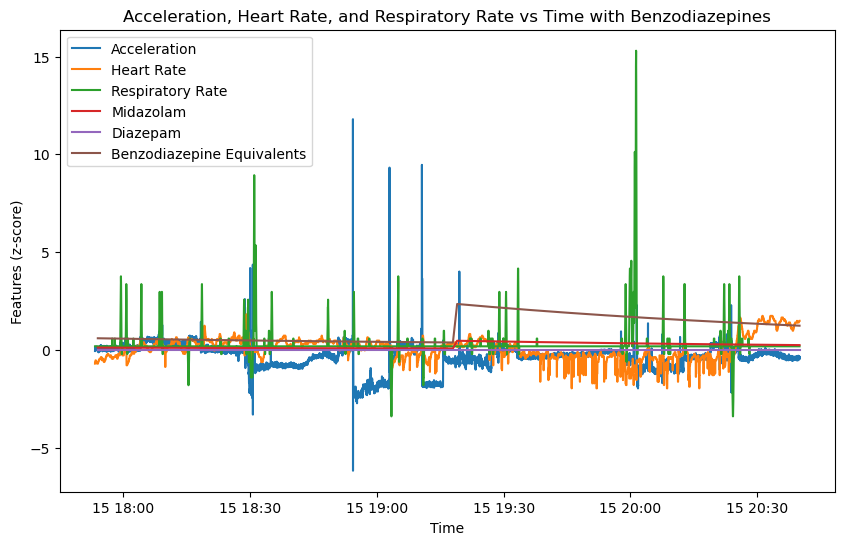

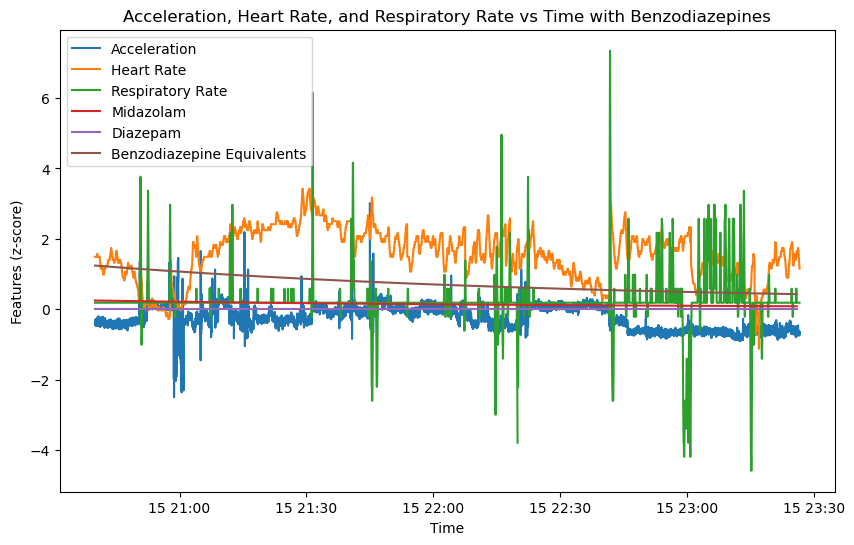

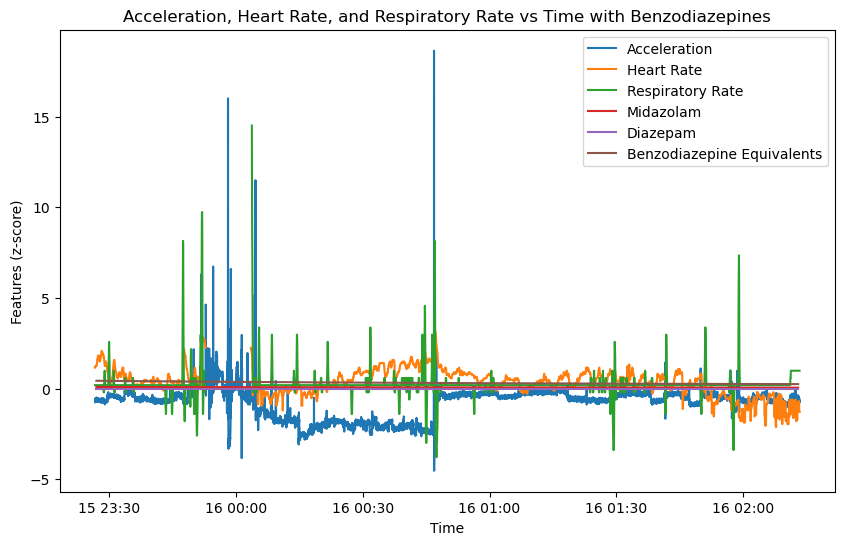

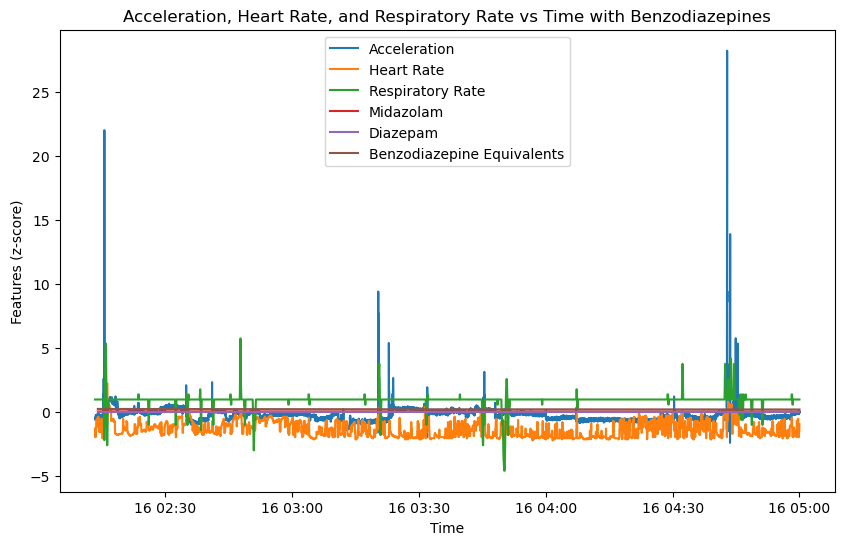

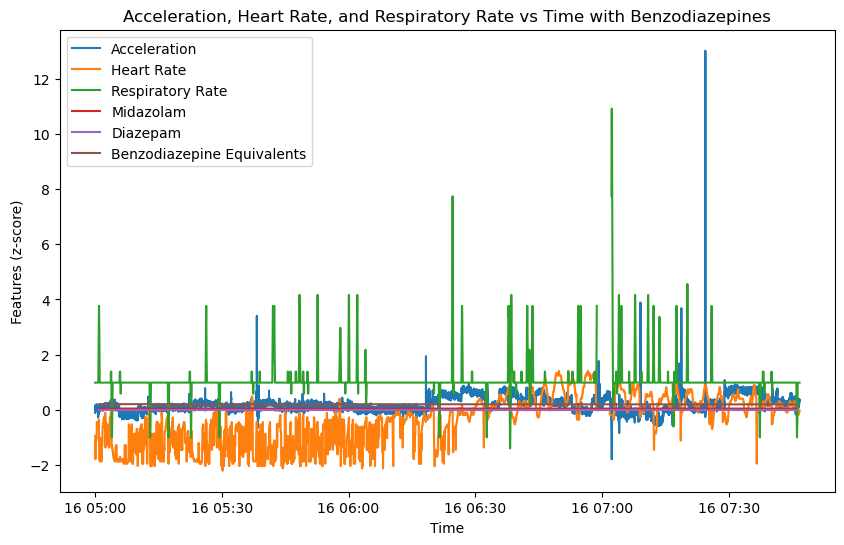

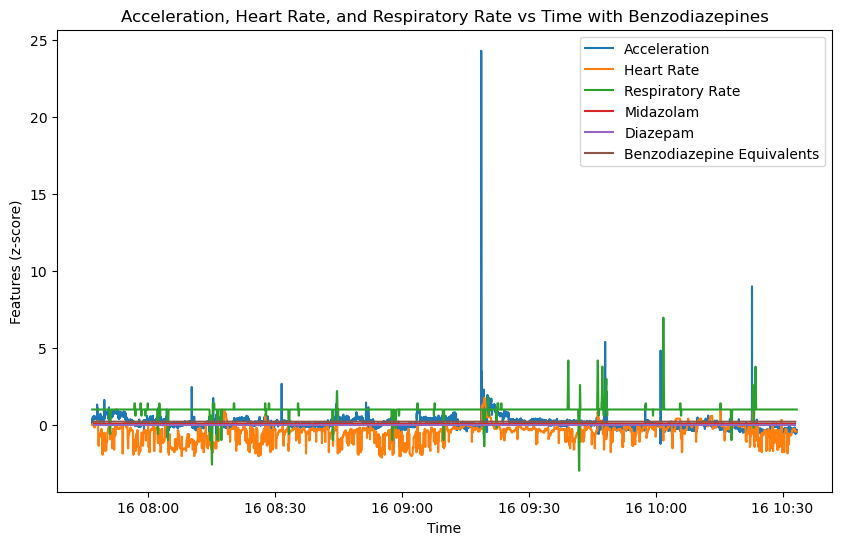

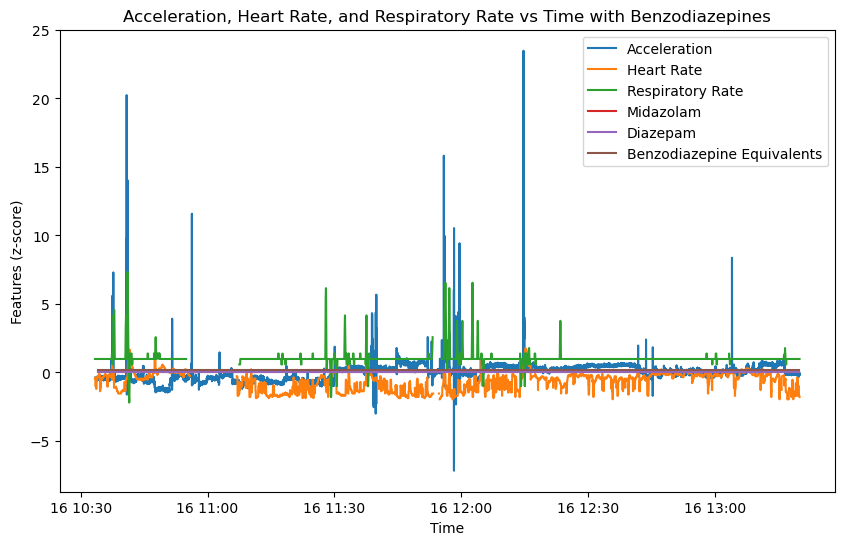

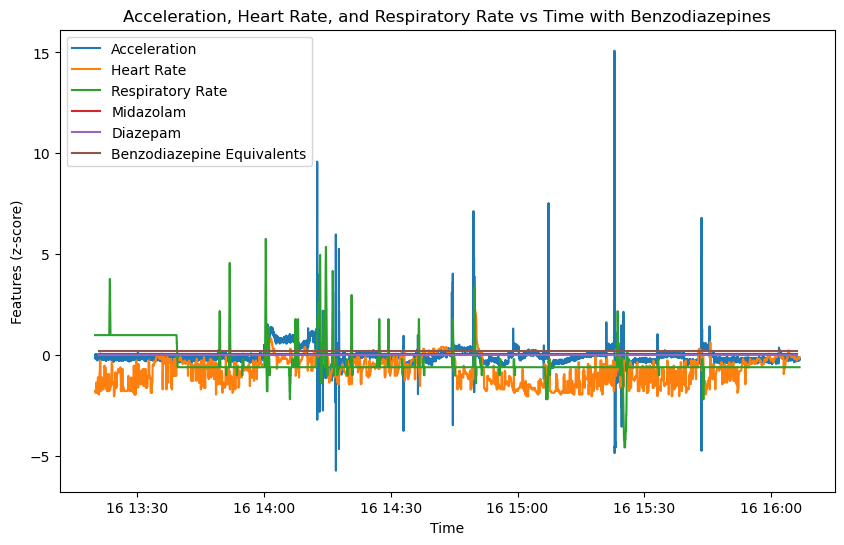

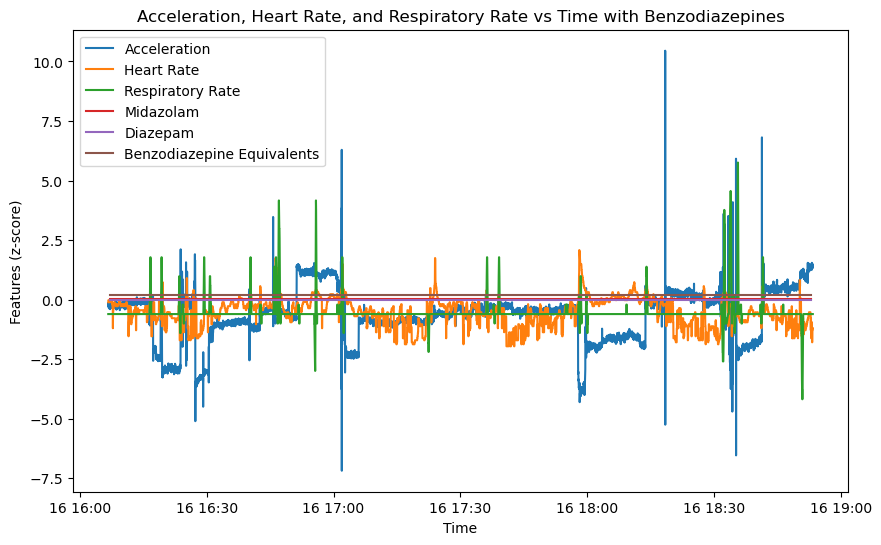

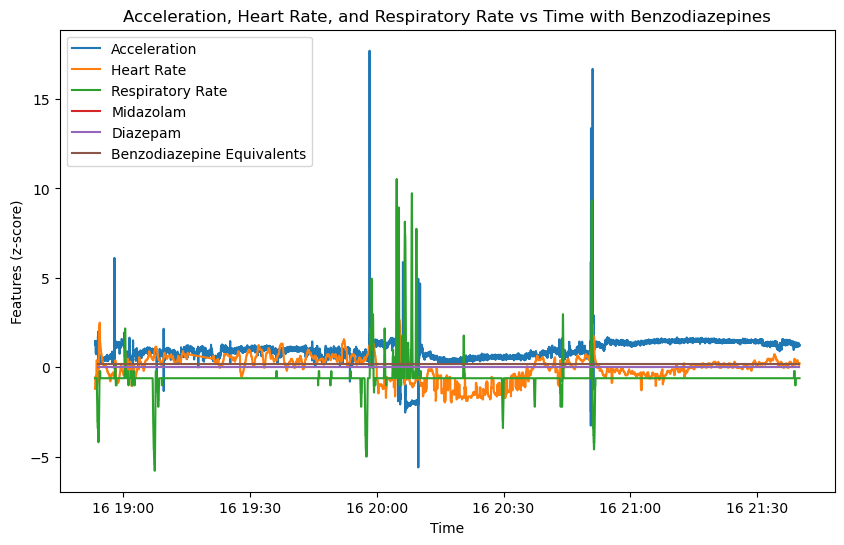

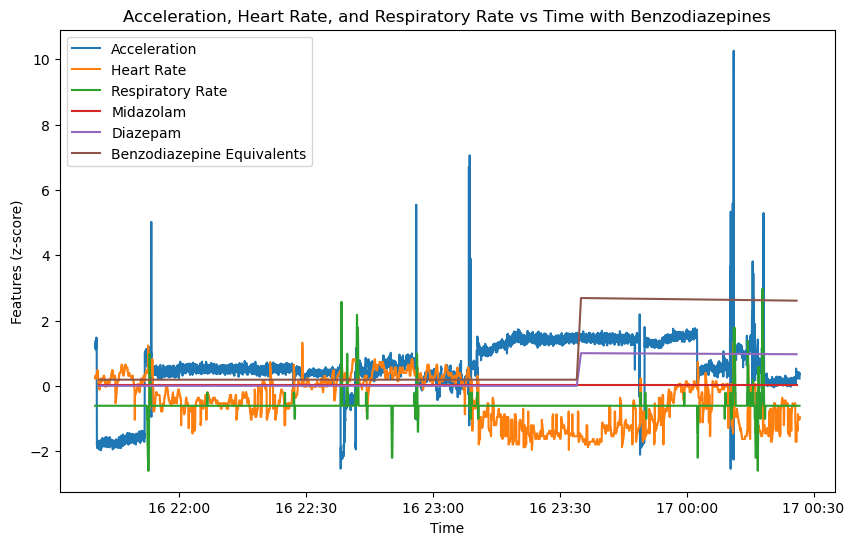

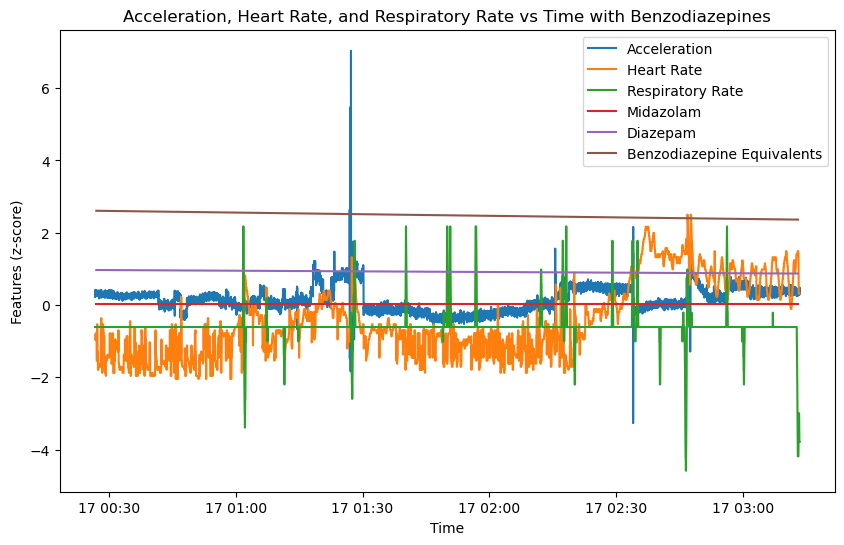

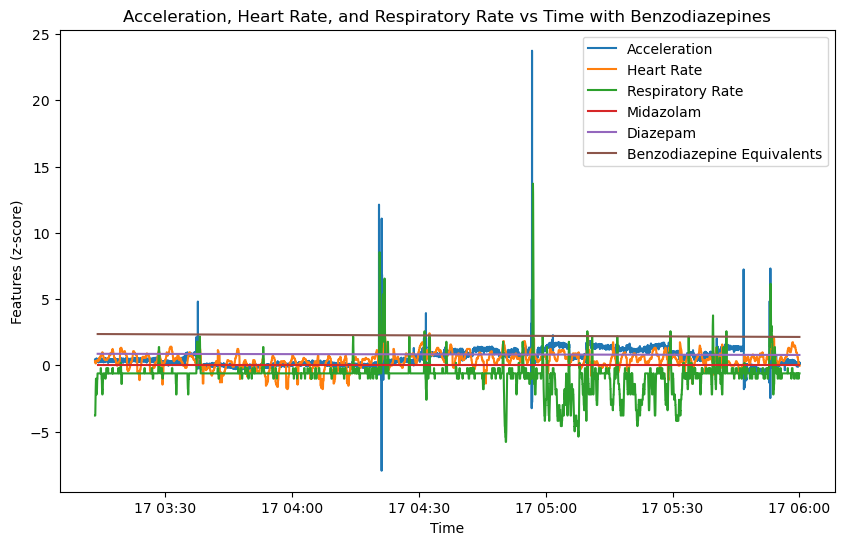

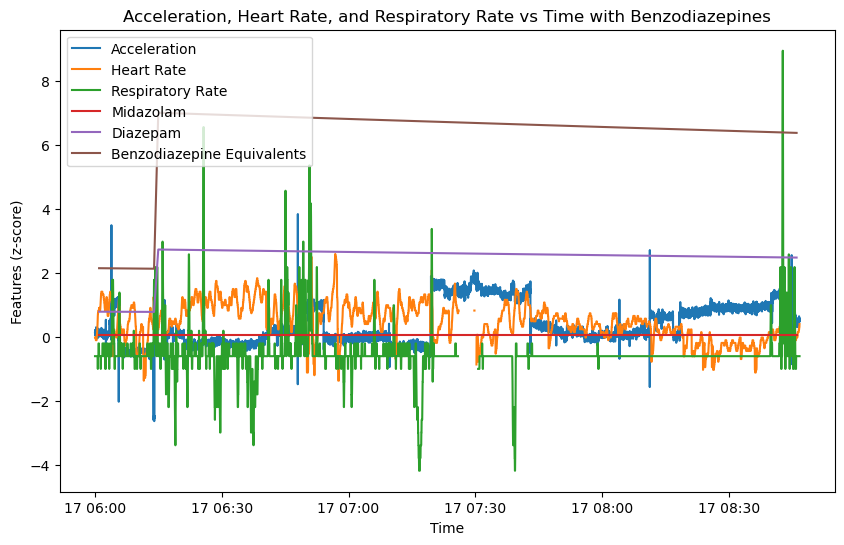

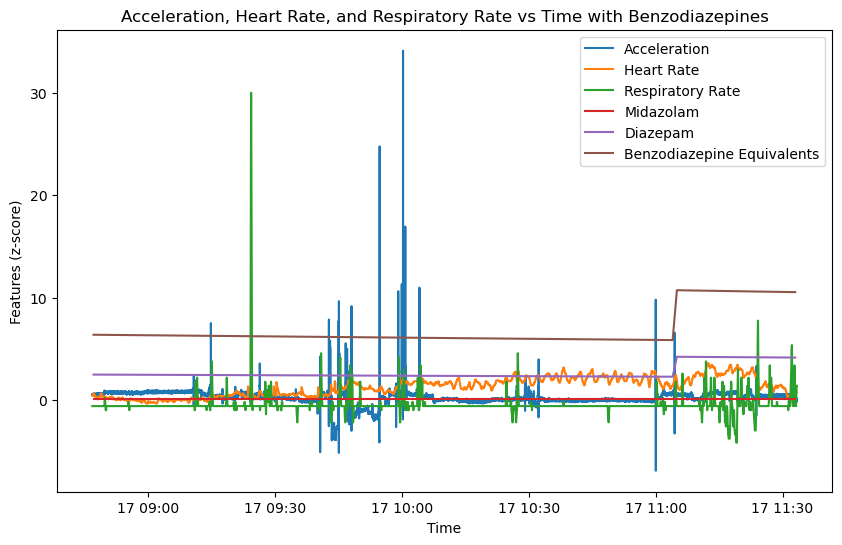

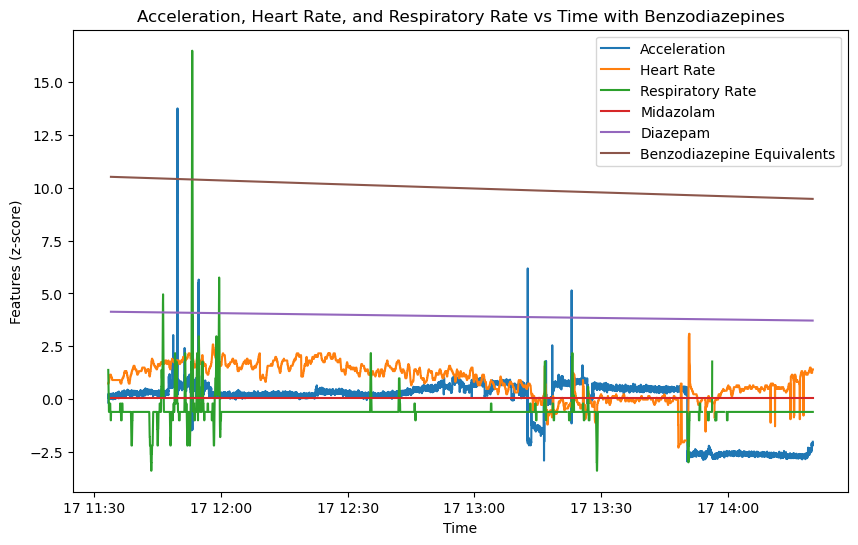

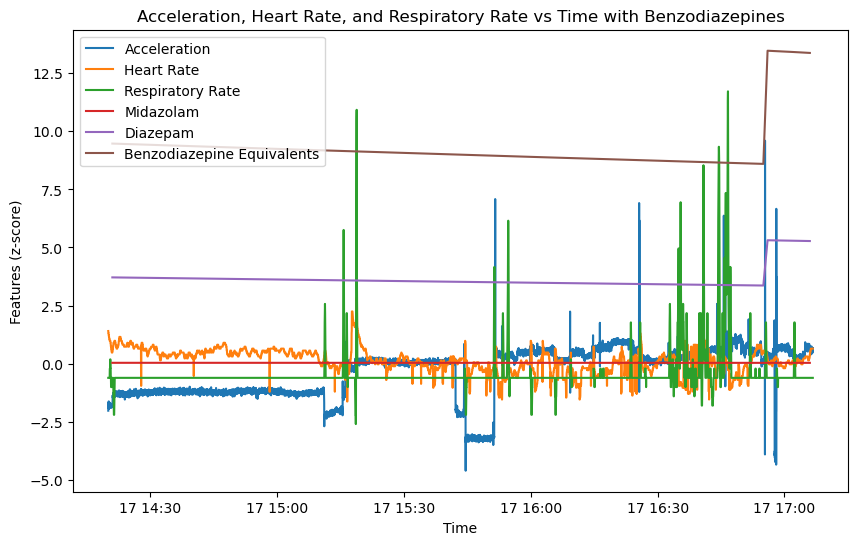

In [51]:
for i in range(0, len(accel9)-10000, 10000):
    start_sample = accel9['time'].iloc[i]
    end_sample = accel9['time'].iloc[i+10000]

    accel9_sample_standardized_sample = accel9_sample_standardized[(accel9_sample_standardized['time'] >= start_sample) & (accel9_sample_standardized['time'] <= end_sample)]
    heart_rate_sample_standardized_sample = heart_rate_sample_standardized[(heart_rate_sample_standardized['time'] >= start_sample) & (heart_rate_sample_standardized['time'] <= end_sample)]
    respiratory_rate_sample_standardized_sample = respiratory_rate_sample_standardized[(respiratory_rate_sample_standardized['time'] >= start_sample) & (respiratory_rate_sample_standardized['time'] <= end_sample)]
    midazolam_sample = midazolam_concentrations[(midazolam_concentrations['time'] >= start_sample) & (midazolam_concentrations['time'] <= end_sample)]
    diazepam_sample = diazepam_concentrations[(diazepam_concentrations['time'] >= start_sample) & (diazepam_concentrations['time'] <= end_sample)]
    equiv_sample = equiv_concentrations[(equiv_concentrations['time'] >= start_sample) & (equiv_concentrations['time'] <= end_sample)]

    plt.figure(figsize=(10, 6))
    plt.plot(accel9_sample_standardized_sample['time'], accel9_sample_standardized_sample['a'])
    plt.plot(heart_rate_sample_standardized_sample['time'], heart_rate_sample_standardized_sample['heart_rate'])
    plt.plot(respiratory_rate_sample_standardized_sample['time'], respiratory_rate_sample_standardized_sample['respiratory_rate'])
    plt.plot(midazolam_sample['time'], midazolam_sample['concentration'])
    plt.plot(diazepam_sample['time'], diazepam_sample['concentration'])
    plt.plot(equiv_sample['time'], equiv_sample['concentration'])
    plt.legend(['Acceleration', 'Heart Rate', 'Respiratory Rate', 'Midazolam', 'Diazepam', 'Benzodiazepine Equivalents'])
    plt.title('Acceleration, Heart Rate, and Respiratory Rate vs Time with Benzodiazepines')
    plt.xlabel('Time')
    plt.ylabel('Features (z-score)')
    plt.show()

In [ ]:
for df in [accel9_sample_standardized, heart_rate_sample_standardized,
           respiratory_rate_sample_standardized, midazolam_concentrations,
           diazepam_concentrations, equiv_concentrations]:
    df['time'] = pd.to_datetime(df['time'])